<a href="https://colab.research.google.com/github/cristobalperezp/Desafio-Itau/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"> Desafío Banco Itaú
<h2 align="center">  Cristóbal Pérez
<h3 align="center"> 
<h3 align="center"> 2022

---

# Lectura de Datos

In [ ]:
# instalación de librerías y paquetes
! pip install squarify
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# configuración de gráficos
sns.set(
    context = 'notebook',
    style='whitegrid',
    palette = sns.color_palette("vlag")
    )
cmap = sns.color_palette("vlag", as_cmap=True)

In [ ]:
# setear el path
path_base = '/content/drive/MyDrive/Desafío Itaú'

In [ ]:
# lectura de datos
saldos = pd.read_csv('/content/drive/MyDrive/Desafío Itaú/Bases de Datos/saldos_consolidados.csv')
cartola = pd.read_csv('/content/drive/MyDrive/Desafío Itaú/Bases de Datos/cartola.csv')
aumento = pd.read_csv('/content/drive/MyDrive/Desafío Itaú/Bases de Datos/aumento_cupo.csv')
predicciones = pd.read_csv('/content/drive/MyDrive/Desafío Itaú/Bases de Datos/predicciones_202209.csv')

# Análisis Exploratorio de Datos

## Exploración Inicial

### Saldos

In [ ]:
# head
saldos.head()

,Edad,SexoId,Segmento,RentaAltamira,RentaEstimada,Q_Prods,SegmentoRiesgo,CCTE_Q_OP,CCTE_SALDO_CLP,CCUOTA_Q_OP,...,Periodo,PAS_Q_OP,CVISTA_Q_OP,CVISTA_SALDO_CLP,CVISTA_SALDO_AVG_CLP,PAT_Q_OP,PAC_Q_OP,IIR_CLASE,DIGITAL_CLASE,id
0,74,0,1,685.667045,NaN,9,a,1,10586.322727,2,...,202208,0,1,0.0,0.0,0,1,C5,C7,1
1,68,1,2,0.000000,NaN,4,a,1,316.987500,0,...,202208,0,0,0.0,0.0,0,0,NaN,NaN,2
2,74,1,1,511.363636,568.181818,2,b,0,0.000000,0,...,202208,0,0,0.0,0.0,0,0,NaN,NaN,3
3,80,0,2,1704.545455,1704.545455,4,a,1,0.000000,0,...,202208,0,1,0.0,0.0,0,0,NaN,NaN,4
4,77,1,3,0.001136,1704.545455,4,a,1,0.000000,0,...,202208,0,0,0.0,0.0,0,5,C4,C6,5


In [ ]:
# shape: # instancias y atributos
saldos.shape

(1583880, 51)

In [ ]:
# atributos, types y no nulos
saldos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583880 entries, 0 to 1583879
Data columns (total 51 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Edad                     1583880 non-null  int64  
 1   SexoId                   1583880 non-null  int64  
 2   Segmento                 1583880 non-null  int64  
 3   RentaAltamira            1583880 non-null  float64
 4   RentaEstimada            175880 non-null   float64
 5   Q_Prods                  1583880 non-null  int64  
 6   SegmentoRiesgo           1582968 non-null  object 
 7   CCTE_Q_OP                1583880 non-null  int64  
 8   CCTE_SALDO_CLP           1583880 non-null  float64
 9   CCUOTA_Q_OP              1583880 non-null  int64  
 10  CCUOTA_MONTO_SOLICITADO  1583880 non-null  float64
 11  CCUOTA_SALDO_CAPITAL     1583880 non-null  float64
 12  CRENEG_Q_OP              1583880 non-null  int64  
 13  CRENEG_MONTO_SOLICITADO  1583880 non-null 

In [ ]:
# instancias duplicadas
saldos.duplicated().sum()

0

In [ ]:
# valores únicos por atributo
saldos.nunique().sort_values()

SexoId                          2
CRENEG_Q_OP                     3
LCRED_Q_OP                      4
DIGITAL_CLASE                   6
CCTE_Q_OP                       6
CVISTA_Q_OP                     6
IIR_CLASE                       7
Periodo                         7
Q_Prods                        11
SBIF_Q_ACREED_CONSUMO          13
SegmentoRiesgo                 14
HIPO_Q_OP                      18
TC_Q_OP                        18
CCUOTA_Q_OP                    26
PAC_Q_OP                       27
Segmento                       27
RentaEstimada                  35
AVNC_TC_Q_OP_MES               37
PAS_Q_OP                       38
SEG_Q_OP                       47
FFMM_Q_OP                      49
GIROATM_Q_OP_MES               56
Edad                           68
PAT_Q_OP                       69
DAP_Q_OP                       88
CRENEG_MONTO_SOLICITADO       132
CRENEG_SALDO_CAPITAL          170
COMPRADEB_Q_OP_MES            216
COMPRA_TC_Q_OP_MES            369
LCRED_CUPO    

In [ ]:
saldos.columns

Index(['Edad', 'SexoId', 'Segmento', 'RentaAltamira', 'RentaEstimada',
       'Q_Prods', 'SegmentoRiesgo', 'CCTE_Q_OP', 'CCTE_SALDO_CLP',
       'CCUOTA_Q_OP', 'CCUOTA_MONTO_SOLICITADO', 'CCUOTA_SALDO_CAPITAL',
       'CRENEG_Q_OP', 'CRENEG_MONTO_SOLICITADO', 'CRENEG_SALDO_CAPITAL',
       'DAP_Q_OP', 'DAP_SALDO_CLP', 'FFMM_Q_OP', 'FFMM_SALDO_PESOS',
       'HIPO_Q_OP', 'HIPO_SALDO_CLP', 'LCRED_Q_OP', 'LCRED_CUPO',
       'LCRED_SALDO_CLP', 'SEG_Q_OP', 'TC_Q_OP', 'TC_CUPO', 'TC_SALDO_CLP',
       'GIROATM_Q_OP_MES', 'GIROATM_MONTO_MES_CLP', 'COMPRADEB_Q_OP_MES',
       'COMPRADEB_MONTO_MES_CLP', 'AVNC_TC_Q_OP_MES', 'AVNC_TC_MONTO_MES_CLP',
       'COMPRA_TC_Q_OP_MES', 'COMPRA_TC_MONTO_MES_CLP', 'SBIF_COMER_MONTO_CLP',
       'SBIF_CONSUMO_MONTO_CLP', 'SBIF_Q_ACREED_CONSUMO', 'SBIF_HP_MONTO_CLP',
       'SBIF_LDISP_MONTO_CLP', 'Periodo', 'PAS_Q_OP', 'CVISTA_Q_OP',
       'CVISTA_SALDO_CLP', 'CVISTA_SALDO_AVG_CLP', 'PAT_Q_OP', 'PAC_Q_OP',
       'IIR_CLASE', 'DIGITAL_CLASE', 'id'],
     

In [ ]:
v_cliente = ['id','Periodo','Edad', 'SexoId','Segmento','SegmentoRiesgo','Q_Prods', 'RentaAltamira', 
 'RentaEstimada','PAS_Q_OP','IIR_CLASE', 'DIGITAL_CLASE']

v_ccte = ['id','Periodo','CCTE_Q_OP', 'CCTE_SALDO_CLP','CCUOTA_Q_OP','LCRED_Q_OP', 'LCRED_CUPO',
 'LCRED_SALDO_CLP','GIROATM_Q_OP_MES', 'GIROATM_MONTO_MES_CLP', 'COMPRADEB_Q_OP_MES',
 'COMPRADEB_MONTO_MES_CLP', 'PAC_Q_OP']
 
v_crcos = ['id','Periodo','CCUOTA_MONTO_SOLICITADO', 'CCUOTA_SALDO_CAPITAL','CRENEG_Q_OP', 
'CRENEG_MONTO_SOLICITADO', 'CRENEG_SALDO_CAPITAL']
 

v_inv = ['id','Periodo','DAP_Q_OP', 'DAP_SALDO_CLP', 'FFMM_Q_OP', 'FFMM_SALDO_PESOS']
 
v_hip =['id','Periodo','HIPO_Q_OP', 'HIPO_SALDO_CLP',  'SEG_Q_OP']
 
v_sf = ['id','Periodo','SBIF_COMER_MONTO_CLP','SBIF_CONSUMO_MONTO_CLP', 'SBIF_Q_ACREED_CONSUMO',
'SBIF_HP_MONTO_CLP','SBIF_LDISP_MONTO_CLP']
 
v_cvista = ['id','Periodo','CVISTA_Q_OP','CVISTA_SALDO_CLP', 'CVISTA_SALDO_AVG_CLP']

v_tc = ['id','Periodo','TC_Q_OP', 'TC_CUPO', 'TC_SALDO_CLP','AVNC_TC_Q_OP_MES', 'AVNC_TC_MONTO_MES_CLP',
 'COMPRA_TC_Q_OP_MES', 'COMPRA_TC_MONTO_MES_CLP','PAT_Q_OP',]


In [ ]:
saldos[v_cliente]

,id,Periodo,Edad,SexoId,Segmento,SegmentoRiesgo,Q_Prods,RentaAltamira,RentaEstimada,PAS_Q_OP,IIR_CLASE,DIGITAL_CLASE
0,1,202208,74,0,1,a,9,685.667045,NaN,0,C5,C7
1,2,202208,68,1,2,a,4,0.000000,NaN,0,NaN,NaN
2,3,202208,74,1,1,b,2,511.363636,568.181818,0,NaN,NaN
3,4,202208,80,0,2,a,4,1704.545455,1704.545455,0,NaN,NaN
4,5,202208,77,1,3,a,4,0.001136,1704.545455,0,C4,C6
...,...,...,...,...,...,...,...,...,...,...,...,...
1583875,231114,202202,45,1,6,c,4,6986.818182,NaN,0,NaN,C7
1583876,231115,202202,50,1,3,b,4,4013.506818,NaN,0,NaN,C6
1583877,231116,202202,43,1,6,a,4,8181.818182,NaN,0,NaN,C7
1583878,231117,202202,47,1,3,a,5,4417.000000,NaN,0,NaN,C5


In [ ]:
saldos[v_cliente].nunique().sort_values()

SexoId                 2
DIGITAL_CLASE          6
Periodo                7
IIR_CLASE              7
Q_Prods               11
SegmentoRiesgo        14
Segmento              27
RentaEstimada         35
PAS_Q_OP              38
Edad                  68
RentaAltamira     208119
id                231955
dtype: int64

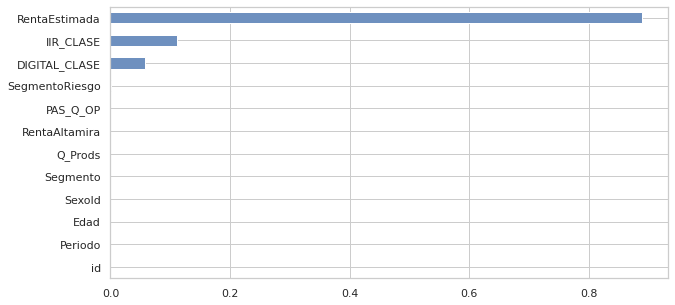

In [ ]:
# gráfico de porcentaje de nulos
(saldos[v_cliente].isna().sum()/saldos[v_cliente].shape[0]).sort_values().plot.barh(figsize=(10,5))

In [ ]:
# estadísticos de variables numéricas
saldos[v_cliente].describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
id,1583880.0,115076.049,66895.132,1.000,57057.000,114709.000,172781.000,2.319550e+05
Periodo,1583880.0,202205.041,1.996,202202.000,202203.000,202205.000,202207.000,2.022080e+05
Edad,1583880.0,42.596,11.575,15.000,34.000,40.000,49.000,1.220000e+02
SexoId,1583880.0,0.585,0.493,0.000,0.000,1.000,1.000,1.000000e+00
Segmento,1583880.0,2.381,1.972,1.000,1.000,1.000,3.000,2.700000e+01
Q_Prods,1583880.0,5.007,1.225,1.000,4.000,5.000,6.000,1.100000e+01
RentaAltamira,1583880.0,4846.183,1194542.309,0.000,1150.894,1765.458,2848.659,5.681831e+08
RentaEstimada,175880.0,1402.475,818.454,227.273,568.182,1022.727,1704.545,1.069217e+04
PAS_Q_OP,1583880.0,0.237,0.589,0.000,0.000,0.000,0.000,6.600000e+01


In [ ]:
#no sirven PAS_Q_OP

In [ ]:
v_cliente
#sirven  'Edad','SexoId','RentaAltamira','PAS_Q_OP','SegmentoRiesgo','Q_Prods'

['id',
 'Periodo',
 'Edad',
 'SexoId',
 'Segmento',
 'SegmentoRiesgo',
 'Q_Prods',
 'RentaAltamira',
 'RentaEstimada',
 'PAS_Q_OP',
 'IIR_CLASE',
 'DIGITAL_CLASE']

In [ ]:
#sns.distplot(saldos[v_cliente]['Edad'])
#aplicar log

In [ ]:
#sns.distplot(saldos[v_cliente]['RentaAltamira'])
#aplicar log

In [ ]:
#sns.distplot(saldos[v_cliente]['PAS_Q_OP'])
#aplicar log

In [ ]:
#sns.histplot(saldos[v_cliente]['SexoId'])

In [ ]:
#sns.histplot(saldos[v_cliente]['Segmento'])

In [ ]:
#sns.histplot(saldos[v_cliente]['SegmentoRiesgo'])

In [ ]:
#sns.histplot(saldos[v_cliente]['Q_Prods'])

In [ ]:
# se rescatan 'Edad','RentaAltamira','PAS_Q_OP','SexoId','SegmentoRiesgo','Q_Prods'

In [ ]:
saldos[v_tc]

,id,Periodo,TC_Q_OP,TC_CUPO,TC_SALDO_CLP,AVNC_TC_Q_OP_MES,AVNC_TC_MONTO_MES_CLP,COMPRA_TC_Q_OP_MES,COMPRA_TC_MONTO_MES_CLP,PAT_Q_OP
0,1,202208,1,1136.363636,609.786364,0,0.0,0,0.000000,0
1,2,202208,2,6818.181818,44.465909,0,0.0,1,3.561364,0
2,3,202208,1,1022.727273,0.000000,0,0.0,0,0.000000,0
3,4,202208,0,0.000000,0.000000,0,0.0,0,0.000000,0
4,5,202208,1,7954.545455,4355.707955,0,0.0,88,4539.076261,0
...,...,...,...,...,...,...,...,...,...,...
1583875,231114,202202,1,13636.363636,10061.073864,0,0.0,31,1389.360227,0
1583876,231115,202202,1,2272.727273,489.461364,0,0.0,9,422.813636,1
1583877,231116,202202,2,14204.545455,3925.940909,0,0.0,38,3451.839773,0
1583878,231117,202202,1,3409.090909,0.872727,0,0.0,0,0.000000,0


In [ ]:
saldos[v_tc].nunique().sort_values()

Periodo                         7
TC_Q_OP                        18
AVNC_TC_Q_OP_MES               37
PAT_Q_OP                       69
COMPRA_TC_Q_OP_MES            369
TC_CUPO                      9753
AVNC_TC_MONTO_MES_CLP       16545
id                         231955
COMPRA_TC_MONTO_MES_CLP    581134
TC_SALDO_CLP               795747
dtype: int64

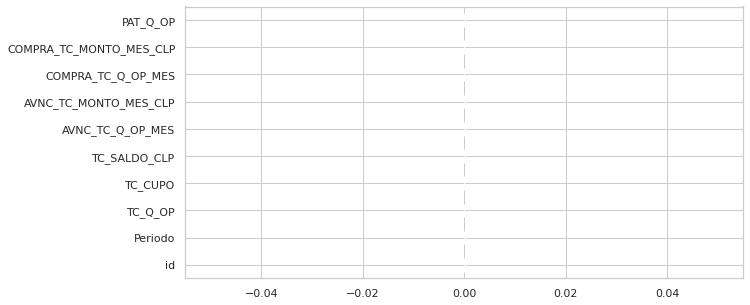

In [ ]:
# gráfico de porcentaje de nulos
(saldos[v_tc].isna().sum()/saldos[v_tc].shape[0]).sort_values().plot.barh(figsize=(10,5))

In [ ]:
# estadísticos de variables numéricas
saldos[v_tc].describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
id,1583880.0,115076.049,66895.132,1.000,57057.000,114709.000,172781.000,231955.000
Periodo,1583880.0,202205.041,1.996,202202.000,202203.000,202205.000,202207.000,202208.000
TC_Q_OP,1583880.0,1.020,0.478,0.000,1.000,1.000,1.000,24.000
TC_CUPO,1583880.0,6471.553,7000.312,0.000,2272.727,4318.182,7954.545,455681.818
TC_SALDO_CLP,1583880.0,1402.553,3239.242,-306125.239,0.000,73.284,1414.801,149099.226
AVNC_TC_Q_OP_MES,1583880.0,0.050,0.391,0.000,0.000,0.000,0.000,107.000
AVNC_TC_MONTO_MES_CLP,1583880.0,47.234,548.298,0.000,0.000,0.000,0.000,84798.128
COMPRA_TC_Q_OP_MES,1583880.0,8.491,19.951,0.000,0.000,0.000,7.000,631.000
COMPRA_TC_MONTO_MES_CLP,1583880.0,597.347,2501.865,0.000,0.000,0.000,365.817,659691.175
PAT_Q_OP,1583880.0,0.398,1.302,0.000,0.000,0.000,0.000,107.000


In [ ]:
# no sirven: AVNC_TC_Q_OP_MES,AVNC_TC_MONTO_MES_CLP,COMPRA_TC_Q_OP_MES,COMPRA_TC_MONTO_MES_CLP,PAT_Q_OP

In [ ]:
v_tc
#sirven TC_Q_OP,TC_CUPO,TC_SALDO_CLP

['id',
 'Periodo',
 'TC_Q_OP',
 'TC_CUPO',
 'TC_SALDO_CLP',
 'AVNC_TC_Q_OP_MES',
 'AVNC_TC_MONTO_MES_CLP',
 'COMPRA_TC_Q_OP_MES',
 'COMPRA_TC_MONTO_MES_CLP',
 'PAT_Q_OP']

In [ ]:
# valores negativos en TC_SALDO_CLP

In [ ]:
#sns.distplot(saldos[v_tc]['TC_CUPO'])
#apligar log

In [ ]:
#sns.distplot(saldos[v_tc]['TC_SALDO_CLP'])

In [ ]:
mask = saldos[v_tc]['TC_SALDO_CLP'] <0
saldos[v_tc][mask]

,id,Periodo,TC_Q_OP,TC_CUPO,TC_SALDO_CLP,AVNC_TC_Q_OP_MES,AVNC_TC_MONTO_MES_CLP,COMPRA_TC_Q_OP_MES,COMPRA_TC_MONTO_MES_CLP,PAT_Q_OP
25,26,202208,2,10454.545455,-281.200000,0,0.0,0,0.000000,0
66,67,202208,1,8295.454545,-46.535227,0,0.0,0,0.000000,0
110,111,202208,1,1136.363636,-0.034091,0,0.0,0,0.000000,0
112,113,202208,1,7386.363636,-38.559091,0,0.0,5,117.045716,3
116,117,202208,1,113.636364,-186.343182,0,0.0,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
1583789,231029,202202,1,1136.363636,-8.597727,0,0.0,0,0.000000,0
1583792,231032,202202,2,4545.454545,-26.376136,0,0.0,0,0.000000,0
1583825,231065,202202,1,12840.909091,-462.923864,0,0.0,12,424.784091,0
1583834,231074,202202,2,3409.090909,-0.048864,0,0.0,0,0.000000,0


In [ ]:
#ns.histplot(saldos[v_tc]['COMPRA_TC_Q_OP_MES'])
#apligar log

In [ ]:
#sns.distplot(saldos[v_tc]['COMPRA_TC_MONTO_MES_CLP'])
#apligar log

In [ ]:
#sns.histplot(saldos[v_tc]['PAT_Q_OP'])
#apligar log

In [ ]:
saldos[v_ccte]

,id,Periodo,CCTE_Q_OP,CCTE_SALDO_CLP,CCUOTA_Q_OP,LCRED_Q_OP,LCRED_CUPO,LCRED_SALDO_CLP,GIROATM_Q_OP_MES,GIROATM_MONTO_MES_CLP,COMPRADEB_Q_OP_MES,COMPRADEB_MONTO_MES_CLP,PAC_Q_OP
0,1,202208,1,10586.322727,2,0,0.000000,0.000000,0,0.000000,21,763.687500,1
1,2,202208,1,316.987500,0,1,1136.363636,-0.000000,0,0.000000,0,0.000000,0
2,3,202208,0,0.000000,0,0,0.000000,0.000000,0,0.000000,0,0.000000,0
3,4,202208,1,0.000000,0,1,4545.454545,4351.481818,0,0.000000,0,0.000000,0
4,5,202208,1,0.000000,0,1,1136.363636,635.146591,2,227.272727,12,141.059091,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583875,231114,202202,1,95399.531818,0,1,1306.818182,-0.000000,1,56.818182,0,0.000000,0
1583876,231115,202202,1,9120.090909,0,1,1136.363636,-0.000000,1,113.636364,0,0.000000,0
1583877,231116,202202,1,61526.118182,0,1,5681.818182,-0.000000,0,0.000000,5,110.729545,0
1583878,231117,202202,1,4.588636,0,1,1136.363636,-0.000000,6,920.625000,0,0.000000,0


In [ ]:
saldos[v_ccte].nunique().sort_values()

LCRED_Q_OP                      4
CCTE_Q_OP                       6
Periodo                         7
CCUOTA_Q_OP                    26
PAC_Q_OP                       27
GIROATM_Q_OP_MES               56
COMPRADEB_Q_OP_MES            216
LCRED_CUPO                   3836
GIROATM_MONTO_MES_CLP        5582
id                         231955
LCRED_SALDO_CLP            253023
COMPRADEB_MONTO_MES_CLP    497841
CCTE_SALDO_CLP             886709
dtype: int64

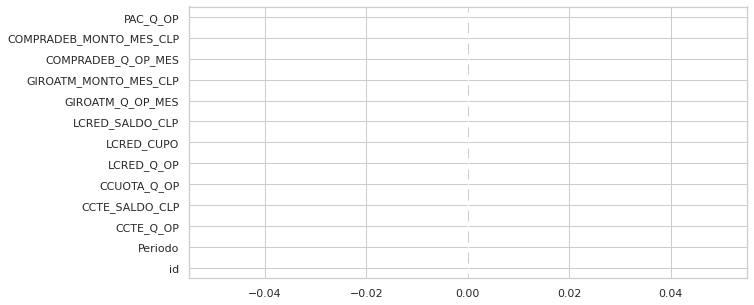

In [ ]:
# gráfico de porcentaje de nulos
(saldos[v_ccte].isna().sum()/saldos[v_ccte].shape[0]).sort_values().plot.barh(figsize=(10,5))

In [ ]:
# estadísticos de variables numéricas
saldos[v_ccte].describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
id,1583880.0,115076.049,66895.132,1.000,57057.000,114709.000,172781.000,231955.000
Periodo,1583880.0,202205.041,1.996,202202.000,202203.000,202205.000,202207.000,202208.000
CCTE_Q_OP,1583880.0,1.028,0.230,0.000,1.000,1.000,1.000,5.000
CCTE_SALDO_CLP,1583880.0,3281.030,12927.728,-44315.123,0.455,349.269,2318.962,4926667.072
CCUOTA_Q_OP,1583880.0,0.526,1.001,0.000,0.000,0.000,1.000,68.000
LCRED_Q_OP,1583880.0,0.976,0.205,0.000,1.000,1.000,1.000,3.000
LCRED_CUPO,1583880.0,2497.482,2963.824,0.000,1136.364,1477.273,2840.909,113636.364
LCRED_SALDO_CLP,1583880.0,218.647,961.543,-12045.455,-0.000,-0.000,0.000,73671.698
GIROATM_Q_OP_MES,1583880.0,0.744,1.714,0.000,0.000,0.000,1.000,83.000
GIROATM_MONTO_MES_CLP,1583880.0,56.117,166.479,0.000,0.000,0.000,22.727,9138.393


In [ ]:
#no sirven CCUOTA_Q_OP,LCRED_SALDO_CLP,GIROATM_Q_OP_MES,GIROATM_MONTO_MES_CLP,COMPRADEB_Q_OP_MES,COMPRADEB_MONTO_MES_CLP,PAC_Q_OP

In [ ]:
v_ccte
#sirven CCTE_Q_OP,CCTE_SALDO_CLP,LCRED_Q_OP,LCRED_CUPO,LCRED_SALDO_CLP

['id',
 'Periodo',
 'CCTE_Q_OP',
 'CCTE_SALDO_CLP',
 'CCUOTA_Q_OP',
 'LCRED_Q_OP',
 'LCRED_CUPO',
 'LCRED_SALDO_CLP',
 'GIROATM_Q_OP_MES',
 'GIROATM_MONTO_MES_CLP',
 'COMPRADEB_Q_OP_MES',
 'COMPRADEB_MONTO_MES_CLP',
 'PAC_Q_OP']

In [ ]:
#valores negativos
#CCTE_SALDO_CLP
#LCRED_SALDO_CLP	

In [ ]:
v_cliente
#sirven  'Edad','SexoId','RentaAltamira','PAS_Q_OP','SegmentoRiesgo','Q_Prods'
v_tc
#sirven 'TC_Q_OP','TC_CUPO','TC_SALDO_CLP'
v_ccte
#sirven 'CCTE_Q_OP','CCTE_SALDO_CLP','LCRED_Q_OP','LCRED_CUPO','LCRED_SALDO_CLP'

['id',
 'Periodo',
 'CCTE_Q_OP',
 'CCTE_SALDO_CLP',
 'CCUOTA_Q_OP',
 'LCRED_Q_OP',
 'LCRED_CUPO',
 'LCRED_SALDO_CLP',
 'GIROATM_Q_OP_MES',
 'GIROATM_MONTO_MES_CLP',
 'COMPRADEB_Q_OP_MES',
 'COMPRADEB_MONTO_MES_CLP',
 'PAC_Q_OP']

In [ ]:
v_cliente = ['id','Periodo','Edad','SexoId','RentaAltamira','PAS_Q_OP','SegmentoRiesgo','Q_Prods']
v_tc = ['id','Periodo','TC_Q_OP','TC_CUPO','TC_SALDO_CLP']
v_ccte = ['id','Periodo','CCTE_Q_OP','CCTE_SALDO_CLP','LCRED_Q_OP','LCRED_CUPO','LCRED_SALDO_CLP']

In [ ]:
var_saldos = ['id','Periodo','Edad','SexoId','RentaAltamira','PAS_Q_OP','SegmentoRiesgo','Q_Prods',
              'TC_Q_OP','TC_CUPO','TC_SALDO_CLP',
              'CCTE_Q_OP','CCTE_SALDO_CLP','LCRED_Q_OP','LCRED_CUPO','LCRED_SALDO_CLP']

In [ ]:
saldo = saldos.copy()
saldo = saldo[var_saldos]

In [ ]:
saldo[saldo['id'] ==1]

,id,Periodo,Edad,SexoId,RentaAltamira,PAS_Q_OP,SegmentoRiesgo,Q_Prods,TC_Q_OP,TC_CUPO,TC_SALDO_CLP,CCTE_Q_OP,CCTE_SALDO_CLP,LCRED_Q_OP,LCRED_CUPO,LCRED_SALDO_CLP
0,1,202208,74,0,685.667045,0,a,9,1,1136.363636,609.786364,1,10586.322727,0,0.0,0.0
231349,1,202207,74,0,685.667045,0,a,9,1,1136.363636,1221.278409,1,11352.039773,0,0.0,0.0
462744,1,202206,74,0,685.667045,0,a,9,1,1136.363636,1177.162500,1,10962.885227,0,0.0,0.0
692488,1,202205,73,0,685.667045,0,a,9,1,1136.363636,1143.067045,1,12507.827273,0,0.0,0.0
919908,1,202204,73,0,685.667045,0,a,8,0,0.000000,0.000000,1,11781.004545,0,0.0,0.0
1144246,1,202203,73,0,685.667045,0,a,8,0,0.000000,0.000000,1,14397.398864,0,0.0,0.0
1365686,1,202202,73,0,685.667045,0,a,8,0,0.000000,0.000000,1,16280.442045,0,0.0,0.0


In [ ]:
saldo.columns

Index(['id', 'Periodo', 'Edad', 'SexoId', 'RentaAltamira', 'PAS_Q_OP',
       'SegmentoRiesgo', 'Q_Prods', 'TC_Q_OP', 'TC_CUPO', 'TC_SALDO_CLP',
       'CCTE_Q_OP', 'CCTE_SALDO_CLP', 'LCRED_Q_OP', 'LCRED_CUPO',
       'LCRED_SALDO_CLP'],
      dtype='object')

In [ ]:
saldo = saldo.rename({
    'Periodo':'periodo',
    'Edad':'edad', 
    'SexoId':'sexo',
    'RentaAltamira':'renta',
    'PAS_Q_OP':'remuneracion_Q_op',
    'SegmentoRiesgo':'segmento_riesgo',
    'Q_Prods':'Q_prods',
    'TC_Q_OP':'TC_q_op',
    'TC_CUPO':'TC_cupo',
    'TC_SALDO_CLP':'TC_saldo',
    'CCTE_Q_OP':'CCTE_Q_op',
    'CCTE_SALDO_CLP':'CCTE_saldo',
    'LCRED_Q_OP':'LCRED_Q_op',
    'LCRED_CUPO':'LCRED_cupo',
    'LCRED_SALDO_CLP':'LCRED_saldo'
}, axis=1)

In [ ]:
saldo

,id,periodo,edad,sexo,renta,remuneracion_Q_op,segmento_riesgo,Q_prods,TC_q_op,TC_cupo,TC_saldo,CCTE_Q_op,CCTE_saldo,LCRED_Q_op,LCRED_cupo,LCRED_saldo
0,1,202208,74,0,685.667045,0,a,9,1,1136.363636,609.786364,1,10586.322727,0,0.000000,0.000000
1,2,202208,68,1,0.000000,0,a,4,2,6818.181818,44.465909,1,316.987500,1,1136.363636,-0.000000
2,3,202208,74,1,511.363636,0,b,2,1,1022.727273,0.000000,0,0.000000,0,0.000000,0.000000
3,4,202208,80,0,1704.545455,0,a,4,0,0.000000,0.000000,1,0.000000,1,4545.454545,4351.481818
4,5,202208,77,1,0.001136,0,a,4,1,7954.545455,4355.707955,1,0.000000,1,1136.363636,635.146591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583875,231114,202202,45,1,6986.818182,0,c,4,1,13636.363636,10061.073864,1,95399.531818,1,1306.818182,-0.000000
1583876,231115,202202,50,1,4013.506818,0,b,4,1,2272.727273,489.461364,1,9120.090909,1,1136.363636,-0.000000
1583877,231116,202202,43,1,8181.818182,0,a,4,2,14204.545455,3925.940909,1,61526.118182,1,5681.818182,-0.000000
1583878,231117,202202,47,1,4417.000000,0,a,5,1,3409.090909,0.872727,1,4.588636,1,1136.363636,-0.000000


### Cartola

In [ ]:
# head
cartola.head()

,COMPRAS_MONTO,COMPRAS_OP,DEPOSITO_MONTO,DEPOSITO_OP,GIROCAJA_MONTO,GIROCAJA_OP,CHEQUE_MONTO,CHEQUE_OP,PAGOCUENTAS_MONTO,PAGOCUENTAS_OP,...,PAGOAUTTC_MONTO,PAGO_CONSUMO_MONTO,PAGO_CONSUMO_OP,PAGO_HIPOTECARIO_MONTO,PAGO_HIPOTECARIO_OP,PAGO_RENE_MONTO,PAGO_RENE_OP,PAGO_CAE_MONTO,PAGO_CAE_OP,id
0,763.687500,21.0,1409.090909,4.0,0.0,0.0,159.631818,2.0,364.943182,7.0,...,158.373864,195.376136,2.0,416.306818,1.0,0.0,0.0,0.0,0.0,1
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2
2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1194.681818,6.0,...,59.948864,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,4
3,141.059091,12.0,0.000000,0.0,0.0,0.0,0.000000,0.0,87.932955,1.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,5
4,89.772727,9.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,6


In [ ]:
# shape: # instancias y atributos
cartola.shape

(1481996, 33)

In [ ]:
# atributos, types y no nulos
cartola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481996 entries, 0 to 1481995
Data columns (total 33 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   COMPRAS_MONTO           1481996 non-null  float64
 1   COMPRAS_OP              1481996 non-null  float64
 2   DEPOSITO_MONTO          1481996 non-null  float64
 3   DEPOSITO_OP             1481996 non-null  float64
 4   GIROCAJA_MONTO          1481996 non-null  float64
 5   GIROCAJA_OP             1481996 non-null  float64
 6   CHEQUE_MONTO            1481996 non-null  float64
 7   CHEQUE_OP               1481996 non-null  float64
 8   PAGOCUENTAS_MONTO       1481996 non-null  float64
 9   PAGOCUENTAS_OP          1481996 non-null  float64
 10  PAGOTC_MONTO            1481996 non-null  float64
 11  PAGOTC_OP               1481996 non-null  float64
 12  PAS_MONTO               1481996 non-null  float64
 13  TRANSFERENCIAS_MONTO    1481996 non-null  float64
 14  TR

In [ ]:
# instancias duplicadas
cartola.duplicated().sum()

0

In [ ]:
# valores únicos por atributo
cartola.nunique().sort_values()

GIROCAJA_MONTO                  1
GIROCAJA_OP                     1
PAGO_CAE_OP                     1
PAGO_CAE_MONTO                  1
PAGO_RENE_OP                    1
PAGO_RENE_MONTO                 1
Periodo                         7
VALEVISTA_OP                   13
PAGO_HIPOTECARIO_OP            20
PAGO_CONSUMO_OP                52
PAGOLCRED_OP                   56
CHEQUE_OP                     100
PAGOTC_OP                     107
DEPOSITO_OP                   136
PAGOCUENTAS_OP                175
COMPRAS_OP                    216
TRANSERENCIAS_OP              297
TOTALABONO_OP                 507
VALEVISTA_MONTO              3780
CHEQUE_MONTO                37774
DEPOSITO_MONTO              38056
PAGOAUTCUENTAS_MONTO       159784
PAGO_CONSUMO_MONTO         176567
PAGOAUTTC_MONTO            218325
id                         228667
PAGO_HIPOTECARIO_MONTO     258482
PAS_MONTO                  269336
PAGOCUENTAS_MONTO          298376
PAGOLCRED_MONTO            319004
PAGOTC_MONTO  

In [ ]:
cartola.columns

Index(['COMPRAS_MONTO', 'COMPRAS_OP', 'DEPOSITO_MONTO', 'DEPOSITO_OP',
       'GIROCAJA_MONTO', 'GIROCAJA_OP', 'CHEQUE_MONTO', 'CHEQUE_OP',
       'PAGOCUENTAS_MONTO', 'PAGOCUENTAS_OP', 'PAGOTC_MONTO', 'PAGOTC_OP',
       'PAS_MONTO', 'TRANSFERENCIAS_MONTO', 'TRANSERENCIAS_OP',
       'VALEVISTA_MONTO', 'VALEVISTA_OP', 'TOTALABONO_MONTO', 'TOTALABONO_OP',
       'Periodo', 'PAGOLCRED_MONTO', 'PAGOLCRED_OP', 'PAGOAUTCUENTAS_MONTO',
       'PAGOAUTTC_MONTO', 'PAGO_CONSUMO_MONTO', 'PAGO_CONSUMO_OP',
       'PAGO_HIPOTECARIO_MONTO', 'PAGO_HIPOTECARIO_OP', 'PAGO_RENE_MONTO',
       'PAGO_RENE_OP', 'PAGO_CAE_MONTO', 'PAGO_CAE_OP', 'id'],
      dtype='object')

In [ ]:
f_cliente = ['id','Periodo','PAS_MONTO','TOTALABONO_MONTO', 'TOTALABONO_OP']

f_ccte = ['id','Periodo','COMPRAS_MONTO', 'COMPRAS_OP','DEPOSITO_MONTO', 'DEPOSITO_OP',
       'GIROCAJA_MONTO', 'GIROCAJA_OP', 'CHEQUE_MONTO', 'CHEQUE_OP',
       'PAGOCUENTAS_MONTO', 'PAGOCUENTAS_OP', 'PAGOTC_MONTO', 'PAGOTC_OP',
       'TRANSFERENCIAS_MONTO', 'TRANSERENCIAS_OP','PAGOLCRED_MONTO', 'PAGOLCRED_OP', 'PAGOAUTCUENTAS_MONTO']



f_otros = ['id','Periodo', 'VALEVISTA_MONTO', 'VALEVISTA_OP',]
 

f_pagos = ['id','Periodo','PAGO_CONSUMO_MONTO', 'PAGO_CONSUMO_OP',
       'PAGO_HIPOTECARIO_MONTO', 'PAGO_HIPOTECARIO_OP', 'PAGO_RENE_MONTO',
       'PAGO_RENE_OP', 'PAGO_CAE_MONTO', 'PAGO_CAE_OP',]
 
f_tc = ['id','Periodo','PAGOTC_MONTO', 'PAGOTC_OP',
       'PAS_MONTO','PAGOAUTTC_MONTO']


In [ ]:
cartola[f_cliente]

,id,Periodo,PAS_MONTO,TOTALABONO_MONTO,TOTALABONO_OP
0,1,202208.0,0.0,3794.363636,16.0
1,2,202208.0,0.0,306.818182,1.0
2,4,202208.0,0.0,4328.512500,18.0
3,5,202208.0,0.0,3067.114773,5.0
4,6,202208.0,0.0,6811.831818,9.0
...,...,...,...,...,...
1481991,231114,202202.0,0.0,148.295455,3.0
1481992,231115,202202.0,0.0,0.000000,0.0
1481993,231116,202202.0,0.0,0.000000,0.0
1481994,231117,202202.0,0.0,1443.181818,2.0


In [ ]:
cartola[f_cliente].nunique().sort_values()

Periodo                   7
TOTALABONO_OP           507
id                   228667
PAS_MONTO            269336
TOTALABONO_MONTO    1027277
dtype: int64

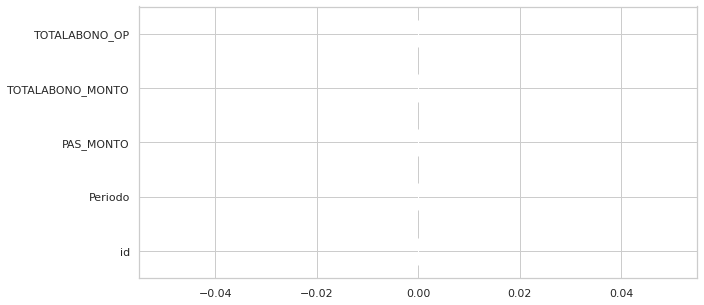

In [ ]:
# gráfico de porcentaje de nulos
(cartola[f_cliente].isna().sum()/cartola[f_cliente].shape[0]).sort_values().plot.barh(figsize=(10,5))

In [ ]:
# estadísticos de variables numéricas
cartola[f_cliente].describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
id,1481996.0,114158.915,66866.889,1.0,56087.750,113159.0,171647.000,231955.000
Periodo,1481996.0,202205.047,1.994,202202.0,202203.000,202205.0,202207.000,202208.000
PAS_MONTO,1481996.0,553.083,2248.466,0.0,0.000,0.0,0.000,888366.108
TOTALABONO_MONTO,1481996.0,7946.808,31417.485,0.0,454.545,2056.3,5899.085,6591913.803
TOTALABONO_OP,1481996.0,10.464,24.800,0.0,2.000,5.0,12.000,8072.000


In [ ]:
#no sirven PAS_MONTO

In [ ]:
f_cliente
#sirven TOTALABONO_MONTO,TOTALABONO_OP

['id', 'Periodo', 'PAS_MONTO', 'TOTALABONO_MONTO', 'TOTALABONO_OP']

In [ ]:
#sns.histplot(cartola[f_cliente]['TOTALABONO_OP'])
#aplicar log

In [ ]:
#PAS_MONTO no aporta

In [ ]:
cartola[f_tc]

,id,Periodo,PAGOTC_MONTO,PAGOTC_OP,PAS_MONTO,PAGOAUTTC_MONTO
0,1,202208.0,476.502273,1.0,0.0,158.373864
1,2,202208.0,0.000000,0.0,0.0,0.000000
2,4,202208.0,0.000000,0.0,0.0,59.948864
3,5,202208.0,1345.800000,1.0,0.0,0.000000
4,6,202208.0,775.528409,1.0,0.0,0.000000
...,...,...,...,...,...,...
1481991,231114,202202.0,1136.363636,1.0,0.0,0.000000
1481992,231115,202202.0,101.951136,1.0,0.0,0.000000
1481993,231116,202202.0,0.000000,0.0,0.0,1688.414773
1481994,231117,202202.0,562.748864,2.0,0.0,0.000000


In [ ]:
cartola[f_tc].nunique().sort_values()

Periodo                 7
PAGOTC_OP             107
PAGOAUTTC_MONTO    218325
id                 228667
PAS_MONTO          269336
PAGOTC_MONTO       411177
dtype: int64

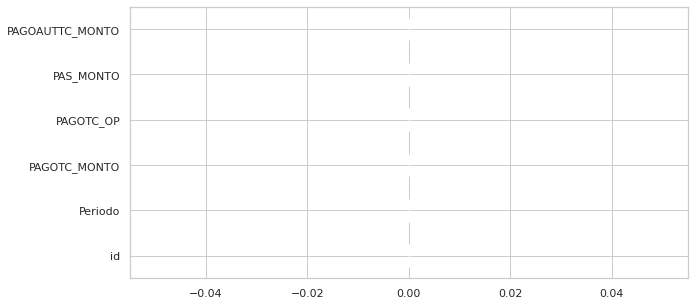

In [ ]:
# gráfico de porcentaje de nulos
(cartola[f_tc].isna().sum()/cartola[f_tc].shape[0]).sort_values().plot.barh(figsize=(10,5))

In [ ]:
# estadísticos de variables numéricas
cartola[f_tc].describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
id,1481996.0,114158.915,66866.889,1.0,56087.75,113159.0,171647.000,231955.000
Periodo,1481996.0,202205.047,1.994,202202.0,202203.00,202205.0,202207.000,202208.000
PAGOTC_MONTO,1481996.0,457.413,2137.245,0.0,0.00,0.0,244.763,694830.860
PAGOTC_OP,1481996.0,0.782,1.954,0.0,0.00,0.0,1.000,146.000
PAS_MONTO,1481996.0,553.083,2248.466,0.0,0.00,0.0,0.000,888366.108
PAGOAUTTC_MONTO,1481996.0,113.735,636.040,0.0,0.00,0.0,0.000,71593.919


In [ ]:
# no sirven PAGOTC_MONTO,PAGOTC_OP,PAS_MONTO,PAGOAUTTC_MONTO

In [ ]:
f_tc
#sirven

['id', 'Periodo', 'PAGOTC_MONTO', 'PAGOTC_OP', 'PAS_MONTO', 'PAGOAUTTC_MONTO']

In [ ]:
#sns.distplot(cartola[f_tc]['PAGOAUTTC_MONTO'])

In [ ]:
cartola[f_ccte]

,id,Periodo,COMPRAS_MONTO,COMPRAS_OP,DEPOSITO_MONTO,DEPOSITO_OP,GIROCAJA_MONTO,GIROCAJA_OP,CHEQUE_MONTO,CHEQUE_OP,PAGOCUENTAS_MONTO,PAGOCUENTAS_OP,PAGOTC_MONTO,PAGOTC_OP,TRANSFERENCIAS_MONTO,TRANSERENCIAS_OP,PAGOLCRED_MONTO,PAGOLCRED_OP,PAGOAUTCUENTAS_MONTO
0,1,202208.0,763.687500,21.0,1409.090909,4.0,0.0,0.0,159.631818,2.0,364.943182,7.0,476.502273,1.0,2017.272727,31.0,0.000000,0.0,7.986364
1,2,202208.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
2,4,202208.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1194.681818,6.0,0.000000,0.0,170.454545,1.0,1392.870455,3.0,0.000000
3,5,202208.0,141.059091,12.0,0.000000,0.0,0.0,0.0,0.000000,0.0,87.932955,1.0,1345.800000,1.0,1480.392045,4.0,53.822727,1.0,257.640909
4,6,202208.0,89.772727,9.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,775.528409,1.0,5365.601136,7.0,934.070455,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481991,231114,202202.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,50.861364,1.0,1136.363636,1.0,674.420455,6.0,0.000000,0.0,7.461364
1481992,231115,202202.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,101.951136,1.0,1122.068182,5.0,0.000000,0.0,7.461364
1481993,231116,202202.0,110.729545,5.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,1690.215909,7.0,0.000000,0.0,7.461364
1481994,231117,202202.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,562.748864,2.0,875.000000,1.0,0.000000,0.0,0.000000


In [ ]:
cartola[f_ccte].nunique().sort_values()

GIROCAJA_MONTO               1
GIROCAJA_OP                  1
Periodo                      7
PAGOLCRED_OP                56
CHEQUE_OP                  100
PAGOTC_OP                  107
DEPOSITO_OP                136
PAGOCUENTAS_OP             175
COMPRAS_OP                 216
TRANSERENCIAS_OP           297
CHEQUE_MONTO             37774
DEPOSITO_MONTO           38056
PAGOAUTCUENTAS_MONTO    159784
id                      228667
PAGOCUENTAS_MONTO       298376
PAGOLCRED_MONTO         319004
PAGOTC_MONTO            411177
COMPRAS_MONTO           497859
TRANSFERENCIAS_MONTO    681882
dtype: int64

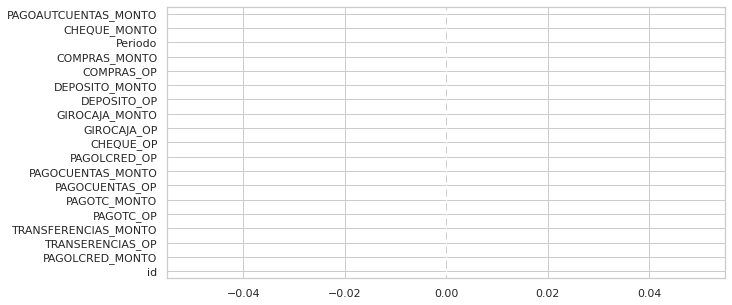

In [ ]:
# gráfico de porcentaje de nulos
(cartola[f_ccte].isna().sum()/cartola[f_ccte].shape[0]).sort_values().plot.barh(figsize=(10,5))

In [ ]:
# estadísticos de variables numéricas
cartola[f_ccte].describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
id,1481996.0,114158.915,66866.889,1.000,56087.75,113159.00,171647.000,231955.000
Periodo,1481996.0,202205.047,1.994,202202.000,202203.00,202205.00,202207.000,202208.000
COMPRAS_MONTO,1481996.0,288.328,542.964,0.000,0.00,0.00,391.139,18926.181
COMPRAS_OP,1481996.0,10.813,17.848,0.000,0.00,0.00,17.000,370.000
DEPOSITO_MONTO,1481996.0,935.256,15561.789,0.000,0.00,0.00,0.000,4886363.636
DEPOSITO_OP,1481996.0,0.217,1.646,0.000,0.00,0.00,0.000,215.000
GIROCAJA_MONTO,1481996.0,0.000,0.000,0.000,0.00,0.00,0.000,0.000
GIROCAJA_OP,1481996.0,0.000,0.000,0.000,0.00,0.00,0.000,0.000
CHEQUE_MONTO,1481996.0,284.073,6268.171,0.000,0.00,0.00,0.000,3205556.060
CHEQUE_OP,1481996.0,0.118,1.099,0.000,0.00,0.00,0.000,154.000


In [ ]:
# No sirven COMPRAS_MONTO,COMPRAS_OP,DEPOSITO_MONTO,DEPOSITO_OP,GIROCAJA_MONTO,GIROCAJA_OP,CHEQUE_MONTO,CHEQUE_OP,PAGOCUENTAS_MONTO,PAGOCUENTAS_OP,PAGOTC_MONTO,PAGOTC_OP,PAGOLCRED_MONTO,PAGOLCRED_OP,PAGOAUTCUENTAS_MONTO

In [ ]:
f_ccte
# sirven TRANSFERENCIAS_MONTO,TRANSERENCIAS_OP

['id',
 'Periodo',
 'COMPRAS_MONTO',
 'COMPRAS_OP',
 'DEPOSITO_MONTO',
 'DEPOSITO_OP',
 'GIROCAJA_MONTO',
 'GIROCAJA_OP',
 'CHEQUE_MONTO',
 'CHEQUE_OP',
 'PAGOCUENTAS_MONTO',
 'PAGOCUENTAS_OP',
 'PAGOTC_MONTO',
 'PAGOTC_OP',
 'TRANSFERENCIAS_MONTO',
 'TRANSERENCIAS_OP',
 'PAGOLCRED_MONTO',
 'PAGOLCRED_OP',
 'PAGOAUTCUENTAS_MONTO']

In [ ]:
#sns.histplot(cartola[f_cliente]['TOTALABONO_OP'])
#aplicar log

In [ ]:
f_cliente
#sirven 'TOTALABONO_MONTO','TOTALABONO_OP'
f_tc
#sirven 'TRANSERENCIAS_OP','TRANSFERENCIAS_MONTO'
f_ccte
# sirven 'TRANSFERENCIAS_MONTO','TRANSERENCIAS_OP'

['id',
 'Periodo',
 'COMPRAS_MONTO',
 'COMPRAS_OP',
 'DEPOSITO_MONTO',
 'DEPOSITO_OP',
 'GIROCAJA_MONTO',
 'GIROCAJA_OP',
 'CHEQUE_MONTO',
 'CHEQUE_OP',
 'PAGOCUENTAS_MONTO',
 'PAGOCUENTAS_OP',
 'PAGOTC_MONTO',
 'PAGOTC_OP',
 'TRANSFERENCIAS_MONTO',
 'TRANSERENCIAS_OP',
 'PAGOLCRED_MONTO',
 'PAGOLCRED_OP',
 'PAGOAUTCUENTAS_MONTO']

In [ ]:
fe_cliente = ['id','Periodo','TOTALABONO_MONTO','TOTALABONO_OP']
fe_tc = ['id','Periodo','TRANSERENCIAS_OP','TRANSFERENCIAS_MONTO']
fe_ccte = ['id','Periodo','TRANSFERENCIAS_MONTO','TRANSERENCIAS_OP']

In [ ]:
var_cartola = ['id','Periodo','TOTALABONO_MONTO','TOTALABONO_OP',
               'TRANSERENCIAS_OP',
               'TRANSFERENCIAS_MONTO']

In [ ]:
cartolas = cartola.copy()
cartolas = cartolas[var_cartola]

In [ ]:
cartolas[cartolas['id']==1]

,id,Periodo,TOTALABONO_MONTO,TOTALABONO_OP,TRANSERENCIAS_OP,TRANSFERENCIAS_MONTO
0,1,202208.0,3794.363636,16.0,31.0,2017.272727
217588,1,202207.0,5249.069318,25.0,22.0,2238.636364
433847,1,202206.0,3320.590909,15.0,23.0,3443.181818
649249,1,202205.0,5772.717045,12.0,21.0,3029.832955
863079,1,202204.0,12153.919318,18.0,23.0,8590.450000
1072299,1,202203.0,2467.261364,13.0,22.0,2264.772727
1280080,1,202202.0,4816.636364,15.0,13.0,1147.727273


In [ ]:
cartolas.columns

Index(['id', 'Periodo', 'TOTALABONO_MONTO', 'TOTALABONO_OP',
       'TRANSERENCIAS_OP', 'TRANSFERENCIAS_MONTO'],
      dtype='object')

In [ ]:
cartolas = cartolas.rename({
    'Periodo':'periodo',
    'TOTALABONO_MONTO':'ABONO_monto',
    'TOTALABONO_OP':'ABONO_op',
    'TRANSERENCIAS_OP':'TRANS_op',
    'TRANSFERENCIAS_MONTO':'TRANS_monto'
}, axis=1)

In [ ]:
cartolas

,id,periodo,ABONO_monto,ABONO_op,TRANS_op,TRANS_monto
0,1,202208.0,3794.363636,16.0,31.0,2017.272727
1,2,202208.0,306.818182,1.0,0.0,0.000000
2,4,202208.0,4328.512500,18.0,1.0,170.454545
3,5,202208.0,3067.114773,5.0,4.0,1480.392045
4,6,202208.0,6811.831818,9.0,7.0,5365.601136
...,...,...,...,...,...,...
1481991,231114,202202.0,148.295455,3.0,6.0,674.420455
1481992,231115,202202.0,0.000000,0.0,5.0,1122.068182
1481993,231116,202202.0,0.000000,0.0,7.0,1690.215909
1481994,231117,202202.0,1443.181818,2.0,1.0,875.000000


### Aumento

In [ ]:
aumento = aumento.rename({
    'Periodo':'periodo',
    'flag_aumento':'aumento'
}, axis=1)
aumento

,periodo,aumento,id
0,202208,1,85
1,202208,1,97
2,202208,1,261
3,202208,1,294
4,202208,1,422
...,...,...,...
33012,202202,1,230962
33013,202202,1,230965
33014,202202,1,230985
33015,202202,1,231013


In [ ]:
aumento['aumento'].value_counts()

1    33017
Name: aumento, dtype: int64

In [ ]:
mask = aumento['periodo'] == 202208
aumento[mask]

,periodo,aumento,id
0,202208,1,85
1,202208,1,97
2,202208,1,261
3,202208,1,294
4,202208,1,422
...,...,...,...
3807,202208,1,230998
3808,202208,1,231023
3809,202208,1,231027
3810,202208,1,231041


In [ ]:
mask = aumento['periodo'] == 202208
aumento[mask]['aumento'].value_counts()

1    3812
Name: aumento, dtype: int64

## Exploración 2

### Saldos

In [ ]:
saldo

,id,periodo,edad,sexo,renta,remuneracion_Q_op,segmento_riesgo,Q_prods,TC_q_op,TC_cupo,TC_saldo,CCTE_Q_op,CCTE_saldo,LCRED_Q_op,LCRED_cupo,LCRED_saldo
0,1,202208,74,0,685.667045,0,a,9,1,1136.363636,609.786364,1,10586.322727,0,0.000000,0.000000
1,2,202208,68,1,0.000000,0,a,4,2,6818.181818,44.465909,1,316.987500,1,1136.363636,-0.000000
2,3,202208,74,1,511.363636,0,b,2,1,1022.727273,0.000000,0,0.000000,0,0.000000,0.000000
3,4,202208,80,0,1704.545455,0,a,4,0,0.000000,0.000000,1,0.000000,1,4545.454545,4351.481818
4,5,202208,77,1,0.001136,0,a,4,1,7954.545455,4355.707955,1,0.000000,1,1136.363636,635.146591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583875,231114,202202,45,1,6986.818182,0,c,4,1,13636.363636,10061.073864,1,95399.531818,1,1306.818182,-0.000000
1583876,231115,202202,50,1,4013.506818,0,b,4,1,2272.727273,489.461364,1,9120.090909,1,1136.363636,-0.000000
1583877,231116,202202,43,1,8181.818182,0,a,4,2,14204.545455,3925.940909,1,61526.118182,1,5681.818182,-0.000000
1583878,231117,202202,47,1,4417.000000,0,a,5,1,3409.090909,0.872727,1,4.588636,1,1136.363636,-0.000000


In [ ]:
saldo.dtypes

id                     int64
periodo                int64
edad                   int64
sexo                   int64
renta                float64
remuneracion_Q_op      int64
segmento_riesgo       object
Q_prods                int64
TC_q_op                int64
TC_cupo              float64
TC_saldo             float64
CCTE_Q_op              int64
CCTE_saldo           float64
LCRED_Q_op             int64
LCRED_cupo           float64
LCRED_saldo          float64
dtype: object

In [ ]:
saldo.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
id,1583880.0,115076.049,66895.132,1.000,57057.000,114709.000,172781.000,2.319550e+05
periodo,1583880.0,202205.041,1.996,202202.000,202203.000,202205.000,202207.000,2.022080e+05
edad,1583880.0,42.596,11.575,15.000,34.000,40.000,49.000,1.220000e+02
sexo,1583880.0,0.585,0.493,0.000,0.000,1.000,1.000,1.000000e+00
renta,1583880.0,4846.183,1194542.309,0.000,1150.894,1765.458,2848.659,5.681831e+08
remuneracion_Q_op,1583880.0,0.237,0.589,0.000,0.000,0.000,0.000,6.600000e+01
Q_prods,1583880.0,5.007,1.225,1.000,4.000,5.000,6.000,1.100000e+01
TC_q_op,1583880.0,1.020,0.478,0.000,1.000,1.000,1.000,2.400000e+01
TC_cupo,1583880.0,6471.553,7000.312,0.000,2272.727,4318.182,7954.545,4.556818e+05
TC_saldo,1583880.0,1402.553,3239.242,-306125.239,0.000,73.284,1414.801,1.490992e+05


In [ ]:
# tienen valores negativos:
# 'TC_saldo','CCTE_saldo','LCRED_saldo'

# Saldo negativo en CCTE_saldo: debe dinero.
# Saldo negativo en TC_saldo: dinero a favor.

In [ ]:
mask = saldo['CCTE_saldo'] < 0
saldo[mask]

,id,periodo,edad,sexo,renta,remuneracion_Q_op,segmento_riesgo,Q_prods,TC_q_op,TC_cupo,TC_saldo,CCTE_Q_op,CCTE_saldo,LCRED_Q_op,LCRED_cupo,LCRED_saldo
13,14,202208,77,1,3814.942045,0,a,5,1,6136.363636,1.131818,1,-55.019318,1,8806.818182,8806.818182
1678,1676,202208,82,0,1281.737500,0,b,5,0,0.000000,0.000000,1,-42.732955,1,568.181818,568.181818
2074,2072,202208,74,1,2595.722727,0,b,6,0,0.000000,0.000000,1,-65.022727,1,3068.181818,3068.181818
2422,2419,202208,71,1,1781.985227,0,b,7,1,1136.363636,1172.797727,1,-41.277273,1,909.090909,909.090909
4066,4060,202208,60,1,6705.779545,0,c,6,1,21363.636364,25373.362500,1,-188.897727,1,6818.181818,6818.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579095,225963,202202,32,1,1190.134091,0,c,5,1,2954.545455,6269.094318,1,-18.602273,1,1704.545455,1704.545455
1579156,226030,202202,31,0,1419.986364,0,g,3,0,0.000000,0.000000,1,-51.767045,1,2045.454545,2045.454545
1581063,228177,202202,41,1,1340.388636,0,b,4,1,1136.363636,1209.721591,1,-28.656818,1,1136.363636,1136.363636
1581533,228703,202202,44,1,1272.071591,0,b,4,1,3181.818182,3219.781818,1,-7.781818,1,1818.181818,1818.181818


In [ ]:
mask = saldo['TC_saldo'] < 0
saldo[mask]

,id,periodo,edad,sexo,renta,remuneracion_Q_op,segmento_riesgo,Q_prods,TC_q_op,TC_cupo,TC_saldo,CCTE_Q_op,CCTE_saldo,LCRED_Q_op,LCRED_cupo,LCRED_saldo
25,26,202208,79,0,6343.986364,0,b,5,2,10454.545455,-281.200000,1,0.000000,1,10113.636364,8611.025000
66,67,202208,75,1,857.143182,0,e,4,1,8295.454545,-46.535227,1,0.000000,1,11590.909091,193.569318
110,111,202208,74,1,864.581818,0,a,4,1,1136.363636,-0.034091,1,79.545455,1,1136.363636,-0.000000
112,113,202208,81,1,1363.636364,0,a,4,1,7386.363636,-38.559091,1,1303.980682,0,0.000000,0.000000
116,117,202208,82,1,5238.872727,0,a,5,1,113.636364,-186.343182,1,28424.407955,1,113.636364,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583789,231029,202202,44,1,2337.102273,0,a,5,1,1136.363636,-8.597727,1,79.275000,1,1136.363636,-0.000000
1583792,231032,202202,36,0,2568.939773,0,c,4,2,4545.454545,-26.376136,2,9898.313636,2,2272.727273,-0.000000
1583825,231065,202202,61,1,3216.107955,1,b,5,1,12840.909091,-462.923864,2,8807.788636,1,6363.636364,-0.000000
1583834,231074,202202,32,1,2568.939773,0,c,4,2,3409.090909,-0.048864,2,20635.451136,2,2272.727273,-0.000000


In [ ]:
mask = saldo['LCRED_saldo'] < 0
saldo[mask]

,id,periodo,edad,sexo,renta,remuneracion_Q_op,segmento_riesgo,Q_prods,TC_q_op,TC_cupo,TC_saldo,CCTE_Q_op,CCTE_saldo,LCRED_Q_op,LCRED_cupo,LCRED_saldo
20092,20066,202208,62,0,990.232955,0,b,5,1,2500.000000,795.914773,1,1668.177273,1,1136.363636,-570.279545
425970,194399,202207,31,1,5606.109091,0,b,6,1,18636.363636,9292.900000,1,0.000000,1,5681.817045,-4.755682
703669,11152,202205,56,1,9865.909091,0,a,4,2,18181.818182,1254.143182,1,1136.436364,1,12829.545455,-5681.818182
731838,39434,202205,53,1,1988.539773,1,a,5,1,7500.000000,-1898.950000,2,2306.818182,1,5000.000000,-802.095455
964226,44607,202204,54,0,1317.473864,1,b,8,1,3636.363636,2400.456818,1,1507.771591,1,1590.909091,-304.545455
986556,67317,202204,47,1,7340.909091,0,a,6,2,25568.181818,3625.148864,1,6598.011364,1,3977.272727,-12045.454545
1214513,71434,202203,46,1,1968.935227,0,b,5,1,4545.454545,0.000000,1,0.000000,1,3409.090909,-0.754545
1388016,22511,202202,50,1,5585.348864,1,a,6,1,64886.363636,24201.360227,1,2398.954545,1,4545.454545,-511.363636


In [ ]:
mask = saldo['LCRED_saldo'] == 0
saldo[mask]

,id,periodo,edad,sexo,renta,remuneracion_Q_op,segmento_riesgo,Q_prods,TC_q_op,TC_cupo,TC_saldo,CCTE_Q_op,CCTE_saldo,LCRED_Q_op,LCRED_cupo,LCRED_saldo
0,1,202208,74,0,685.667045,0,a,9,1,1136.363636,609.786364,1,10586.322727,0,0.000000,0.0
1,2,202208,68,1,0.000000,0,a,4,2,6818.181818,44.465909,1,316.987500,1,1136.363636,-0.0
2,3,202208,74,1,511.363636,0,b,2,1,1022.727273,0.000000,0,0.000000,0,0.000000,0.0
5,6,202208,78,1,5089.192045,0,a,4,2,12215.909091,427.164773,2,1402.802273,1,7500.000000,-0.0
6,7,202208,80,0,1441.511364,0,a,7,1,2386.363636,601.748864,1,10222.148864,1,2159.090909,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583875,231114,202202,45,1,6986.818182,0,c,4,1,13636.363636,10061.073864,1,95399.531818,1,1306.818182,-0.0
1583876,231115,202202,50,1,4013.506818,0,b,4,1,2272.727273,489.461364,1,9120.090909,1,1136.363636,-0.0
1583877,231116,202202,43,1,8181.818182,0,a,4,2,14204.545455,3925.940909,1,61526.118182,1,5681.818182,-0.0
1583878,231117,202202,47,1,4417.000000,0,a,5,1,3409.090909,0.872727,1,4.588636,1,1136.363636,-0.0


In [ ]:
# outliers en 'LCRED_saldo'

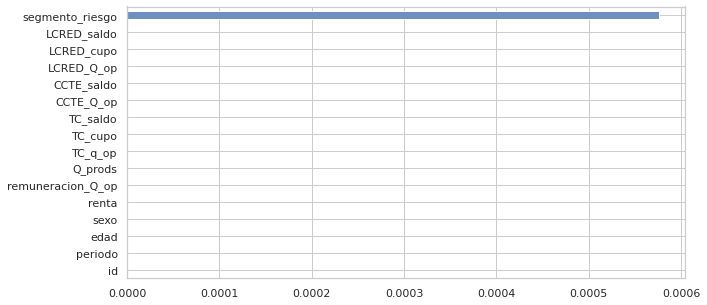

In [ ]:
(saldo.isna().sum()/saldo.shape[0]).sort_values().plot.barh(figsize=(10, 5))

In [ ]:
# faltan datos en:
# 'segmento_riesgo'

In [ ]:
#saldo_continuas = ['edad','renta','TC_cupo',
                   #'TC_saldo','CCTE_saldo',
            #       'LCRED_cupo',
                   #'LCRED_saldo'
             #      ]

#graf = saldo[saldo_continuas].copy()
#graf = graf

#f = plt.figure(figsize=(15,15))
#for i in range(4):
#    f.add_subplot(4, 3, i+1)
#    sns.distplot(graf.iloc[:,i])
#plt.show()

In [ ]:
# transformaciones logarítmicas:
# 'edad','renta','TC_cupo','LCRED_cupo'

In [ ]:
#saldo_continuas2 = ['remuneracion_Q_op','Q_prods','TC_q_op','CCTE_Q_op','LCRED_Q_op']

#graf = saldo[saldo_continuas2].copy()
#graf = graf

#f = plt.figure(figsize=(15,15))
#for i in range(5):
#    f.add_subplot(4, 3, i+1)
#    sns.distplot(graf.iloc[:,i])
#plt.show()

In [ ]:
# transformaciones logarítmicas:
# 'remuneracion_Q_op','TC_q_op'

In [ ]:
#saldo['sexo'].value_counts().plot.barh(figsize=(10,3))

In [ ]:
#saldo['segmento_riesgo'].value_counts().plot.barh(figsize=(10,5))

In [ ]:
# se puede agrupar d+ como segmentos

In [ ]:
# categóricas:
# 'sexo','segmento_riesgo'

In [ ]:
saldo['Q_prods'].value_counts()

5     518428
4     435456
6     339236
7     132583
3      93003
8      33329
2      15806
1      11049
9       4742
10       241
11         7
Name: Q_prods, dtype: int64

In [ ]:
saldo['CCTE_Q_op'].value_counts()

1    1508678
2      55270
0      17132
3       2574
4        183
5         43
Name: CCTE_Q_op, dtype: int64

In [ ]:
saldo['LCRED_Q_op'].value_counts()

1    1516545
0      52931
2      14261
3        143
Name: LCRED_Q_op, dtype: int64

In [ ]:
# ojo con estas variables
# 'Q_prods','CCTE_Q_op','LCRED_Q_op'

In [ ]:
# comentarios:

# tienen valores negativos:
# 'TC_saldo','CCTE_saldo','LCRED_saldo'

# Saldo negativo en CCTE_saldo: debe dinero.
# Saldo negativo en TC_saldo: dinero a favor.

# outliers en 'LCRED_saldo'

# faltan datos en:
# 'segmento_riesgo'

# transformaciones logarítmicas:
# 'edad','renta','TC_cupo','LCRED_cupo'

# transformaciones logarítmicas:
# 'remuneracion_Q_op','TC_q_op'

# categóricas:
# 'sexo','segmento_riesgo'
# se puede agrupar d+ como segmentos

# ojo con estas variables
# 'Q_prods','CCTE_Q_op','LCRED_Q_op'

### Cartolas

In [ ]:
cartolas

,id,periodo,ABONO_monto,ABONO_op,TRANS_op,TRANS_monto
0,1,202208.0,3794.363636,16.0,31.0,2017.272727
1,2,202208.0,306.818182,1.0,0.0,0.000000
2,4,202208.0,4328.512500,18.0,1.0,170.454545
3,5,202208.0,3067.114773,5.0,4.0,1480.392045
4,6,202208.0,6811.831818,9.0,7.0,5365.601136
...,...,...,...,...,...,...
1481991,231114,202202.0,148.295455,3.0,6.0,674.420455
1481992,231115,202202.0,0.000000,0.0,5.0,1122.068182
1481993,231116,202202.0,0.000000,0.0,7.0,1690.215909
1481994,231117,202202.0,1443.181818,2.0,1.0,875.000000


In [ ]:
cartolas.dtypes

id               int64
periodo        float64
ABONO_monto    float64
ABONO_op       float64
TRANS_op       float64
TRANS_monto    float64
dtype: object

In [ ]:
cartolas.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
id,1481996.0,114158.915,66866.889,1.000,56087.750,113159.00,171647.000,231955.000
periodo,1481996.0,202205.047,1.994,202202.000,202203.000,202205.00,202207.000,202208.000
ABONO_monto,1481996.0,7946.808,31417.485,0.000,454.545,2056.30,5899.085,6591913.803
ABONO_op,1481996.0,10.464,24.800,0.000,2.000,5.00,12.000,8072.000
TRANS_op,1481996.0,7.010,20.712,0.000,0.000,3.00,10.000,5350.000
TRANS_monto,1481996.0,2111.063,7725.697,-5677.326,0.000,528.75,1980.139,4868315.477


In [ ]:
mask = cartolas['TRANS_monto'] < 0
cartolas[mask]

,id,periodo,ABONO_monto,ABONO_op,TRANS_op,TRANS_monto
88994,93443,202208.0,154654.377273,9.0,10.0,-2578.520455
200621,213174,202208.0,372702.196591,7.0,19.0,-5677.326136


In [ ]:
# corresponden outliers en 'TRANS_monto'

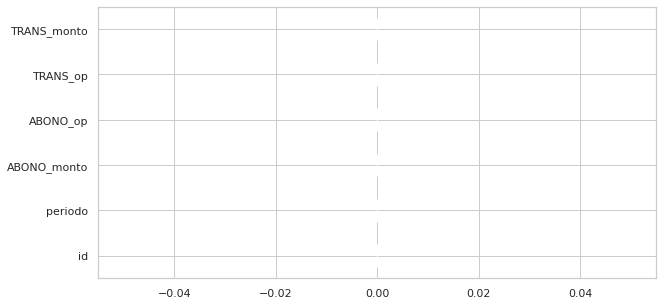

In [ ]:
(cartolas.isna().sum()/cartolas.shape[0]).sort_values().plot.barh(figsize=(10, 5))

In [ ]:
cartolas['ABONO_op'].value_counts()

2.0       188760
1.0       169136
3.0       137587
4.0       110299
5.0        92869
           ...  
401.0          1
1038.0         1
2380.0         1
903.0          1
737.0          1
Name: ABONO_op, Length: 507, dtype: int64

In [ ]:
cartolas['TRANS_op'].value_counts()

0.0      405716
1.0      170383
2.0      106094
3.0       80727
4.0       68343
          ...  
349.0         1
278.0         1
509.0         1
279.0         1
336.0         1
Name: TRANS_op, Length: 297, dtype: int64

In [ ]:
#cartolas_continuas = ['ABONO_monto','ABONO_op','TRANS_op',
 #                  'TRANS_monto'
  #                 ]

#graf = cartolas[cartolas_continuas].copy()
#graf = graf

#f = plt.figure(figsize=(15,15))
#for i in range(4):
 #   f.add_subplot(4, 3, i+1)
  #  sns.distplot(graf.iloc[:,i])
#plt.show()

In [ ]:
# transformaciones logarítmicas:
# 'ABONO_monto','ABONO_op','TRANS_op'

In [ ]:
# comentarios:

# corresponden outliers en 'TRANS_monto'

# transformaciones logarítmicas:
# 'ABONO_monto','ABONO_op','TRANS_op'

### DataFrame

In [ ]:
cartolas['periodo'] = pd.to_numeric(cartolas['periodo'],downcast='integer')
cartolas['TRANS_op'] = pd.to_numeric(cartolas['TRANS_op'],downcast='integer')
cartolas['ABONO_op'] = pd.to_numeric(cartolas['ABONO_op'],downcast='integer')

In [ ]:
datos = pd.merge(
    saldo,
    cartolas,
    how = 'left',
    on = ['id','periodo']
)

In [ ]:
datos

,id,periodo,edad,sexo,renta,remuneracion_Q_op,segmento_riesgo,Q_prods,TC_q_op,TC_cupo,TC_saldo,CCTE_Q_op,CCTE_saldo,LCRED_Q_op,LCRED_cupo,LCRED_saldo,ABONO_monto,ABONO_op,TRANS_op,TRANS_monto
0,1,202208,74,0,685.667045,0,a,9,1,1136.363636,609.786364,1,10586.322727,0,0.000000,0.000000,3794.363636,16.0,31.0,2017.272727
1,2,202208,68,1,0.000000,0,a,4,2,6818.181818,44.465909,1,316.987500,1,1136.363636,-0.000000,306.818182,1.0,0.0,0.000000
2,3,202208,74,1,511.363636,0,b,2,1,1022.727273,0.000000,0,0.000000,0,0.000000,0.000000,NaN,NaN,NaN,NaN
3,4,202208,80,0,1704.545455,0,a,4,0,0.000000,0.000000,1,0.000000,1,4545.454545,4351.481818,4328.512500,18.0,1.0,170.454545
4,5,202208,77,1,0.001136,0,a,4,1,7954.545455,4355.707955,1,0.000000,1,1136.363636,635.146591,3067.114773,5.0,4.0,1480.392045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583875,231114,202202,45,1,6986.818182,0,c,4,1,13636.363636,10061.073864,1,95399.531818,1,1306.818182,-0.000000,148.295455,3.0,6.0,674.420455
1583876,231115,202202,50,1,4013.506818,0,b,4,1,2272.727273,489.461364,1,9120.090909,1,1136.363636,-0.000000,0.000000,0.0,5.0,1122.068182
1583877,231116,202202,43,1,8181.818182,0,a,4,2,14204.545455,3925.940909,1,61526.118182,1,5681.818182,-0.000000,0.000000,0.0,7.0,1690.215909
1583878,231117,202202,47,1,4417.000000,0,a,5,1,3409.090909,0.872727,1,4.588636,1,1136.363636,-0.000000,1443.181818,2.0,1.0,875.000000


In [ ]:
datos['periodo'] = datos['periodo']+1

In [ ]:
datos

,id,periodo,edad,sexo,renta,remuneracion_Q_op,segmento_riesgo,Q_prods,TC_q_op,TC_cupo,TC_saldo,CCTE_Q_op,CCTE_saldo,LCRED_Q_op,LCRED_cupo,LCRED_saldo,ABONO_monto,ABONO_op,TRANS_op,TRANS_monto
0,1,202209,74,0,685.667045,0,a,9,1,1136.363636,609.786364,1,10586.322727,0,0.000000,0.000000,3794.363636,16.0,31.0,2017.272727
1,2,202209,68,1,0.000000,0,a,4,2,6818.181818,44.465909,1,316.987500,1,1136.363636,-0.000000,306.818182,1.0,0.0,0.000000
2,3,202209,74,1,511.363636,0,b,2,1,1022.727273,0.000000,0,0.000000,0,0.000000,0.000000,NaN,NaN,NaN,NaN
3,4,202209,80,0,1704.545455,0,a,4,0,0.000000,0.000000,1,0.000000,1,4545.454545,4351.481818,4328.512500,18.0,1.0,170.454545
4,5,202209,77,1,0.001136,0,a,4,1,7954.545455,4355.707955,1,0.000000,1,1136.363636,635.146591,3067.114773,5.0,4.0,1480.392045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583875,231114,202203,45,1,6986.818182,0,c,4,1,13636.363636,10061.073864,1,95399.531818,1,1306.818182,-0.000000,148.295455,3.0,6.0,674.420455
1583876,231115,202203,50,1,4013.506818,0,b,4,1,2272.727273,489.461364,1,9120.090909,1,1136.363636,-0.000000,0.000000,0.0,5.0,1122.068182
1583877,231116,202203,43,1,8181.818182,0,a,4,2,14204.545455,3925.940909,1,61526.118182,1,5681.818182,-0.000000,0.000000,0.0,7.0,1690.215909
1583878,231117,202203,47,1,4417.000000,0,a,5,1,3409.090909,0.872727,1,4.588636,1,1136.363636,-0.000000,1443.181818,2.0,1.0,875.000000


In [ ]:
df = pd.merge(
    datos,
    aumento,
    how = 'left',
    on = ['id','periodo']
)

In [ ]:
df.head()

,id,periodo,edad,sexo,renta,remuneracion_Q_op,segmento_riesgo,Q_prods,TC_q_op,TC_cupo,...,CCTE_Q_op,CCTE_saldo,LCRED_Q_op,LCRED_cupo,LCRED_saldo,ABONO_monto,ABONO_op,TRANS_op,TRANS_monto,aumento
0,1,202209,74,0,685.667045,0,a,9,1,1136.363636,...,1,10586.322727,0,0.000000,0.000000,3794.363636,16.0,31.0,2017.272727,NaN
1,2,202209,68,1,0.000000,0,a,4,2,6818.181818,...,1,316.987500,1,1136.363636,-0.000000,306.818182,1.0,0.0,0.000000,NaN
2,3,202209,74,1,511.363636,0,b,2,1,1022.727273,...,0,0.000000,0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
3,4,202209,80,0,1704.545455,0,a,4,0,0.000000,...,1,0.000000,1,4545.454545,4351.481818,4328.512500,18.0,1.0,170.454545,NaN
4,5,202209,77,1,0.001136,0,a,4,1,7954.545455,...,1,0.000000,1,1136.363636,635.146591,3067.114773,5.0,4.0,1480.392045,NaN


In [ ]:
df.tail()

,id,periodo,edad,sexo,renta,remuneracion_Q_op,segmento_riesgo,Q_prods,TC_q_op,TC_cupo,...,CCTE_Q_op,CCTE_saldo,LCRED_Q_op,LCRED_cupo,LCRED_saldo,ABONO_monto,ABONO_op,TRANS_op,TRANS_monto,aumento
1583875,231114,202203,45,1,6986.818182,0,c,4,1,13636.363636,...,1,95399.531818,1,1306.818182,-0.0,148.295455,3.0,6.0,674.420455,NaN
1583876,231115,202203,50,1,4013.506818,0,b,4,1,2272.727273,...,1,9120.090909,1,1136.363636,-0.0,0.000000,0.0,5.0,1122.068182,NaN
1583877,231116,202203,43,1,8181.818182,0,a,4,2,14204.545455,...,1,61526.118182,1,5681.818182,-0.0,0.000000,0.0,7.0,1690.215909,NaN
1583878,231117,202203,47,1,4417.000000,0,a,5,1,3409.090909,...,1,4.588636,1,1136.363636,-0.0,1443.181818,2.0,1.0,875.000000,NaN
1583879,231118,202203,37,1,14657.411364,0,f,4,1,5681.818182,...,1,3835.646591,1,3409.090909,-0.0,1606.111364,5.0,4.0,89.375000,NaN


In [ ]:
df

,id,periodo,edad,sexo,renta,remuneracion_Q_op,segmento_riesgo,Q_prods,TC_q_op,TC_cupo,...,CCTE_Q_op,CCTE_saldo,LCRED_Q_op,LCRED_cupo,LCRED_saldo,ABONO_monto,ABONO_op,TRANS_op,TRANS_monto,aumento
0,1,202209,74,0,685.667045,0,a,9,1,1136.363636,...,1,10586.322727,0,0.000000,0.000000,3794.363636,16.0,31.0,2017.272727,NaN
1,2,202209,68,1,0.000000,0,a,4,2,6818.181818,...,1,316.987500,1,1136.363636,-0.000000,306.818182,1.0,0.0,0.000000,NaN
2,3,202209,74,1,511.363636,0,b,2,1,1022.727273,...,0,0.000000,0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
3,4,202209,80,0,1704.545455,0,a,4,0,0.000000,...,1,0.000000,1,4545.454545,4351.481818,4328.512500,18.0,1.0,170.454545,NaN
4,5,202209,77,1,0.001136,0,a,4,1,7954.545455,...,1,0.000000,1,1136.363636,635.146591,3067.114773,5.0,4.0,1480.392045,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583875,231114,202203,45,1,6986.818182,0,c,4,1,13636.363636,...,1,95399.531818,1,1306.818182,-0.000000,148.295455,3.0,6.0,674.420455,NaN
1583876,231115,202203,50,1,4013.506818,0,b,4,1,2272.727273,...,1,9120.090909,1,1136.363636,-0.000000,0.000000,0.0,5.0,1122.068182,NaN
1583877,231116,202203,43,1,8181.818182,0,a,4,2,14204.545455,...,1,61526.118182,1,5681.818182,-0.000000,0.000000,0.0,7.0,1690.215909,NaN
1583878,231117,202203,47,1,4417.000000,0,a,5,1,3409.090909,...,1,4.588636,1,1136.363636,-0.000000,1443.181818,2.0,1.0,875.000000,NaN


In [ ]:
df.shape

(1583880, 21)

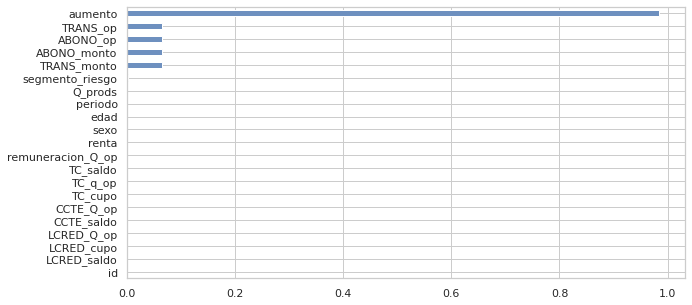

In [ ]:
(df.isna().sum()/df.shape[0]).sort_values().plot.barh(figsize=(10, 5))

In [ ]:
df.isna().sum()

id                         0
periodo                    0
edad                       0
sexo                       0
renta                      0
remuneracion_Q_op          0
segmento_riesgo          912
Q_prods                    0
TC_q_op                    0
TC_cupo                    0
TC_saldo                   0
CCTE_Q_op                  0
CCTE_saldo                 0
LCRED_Q_op                 0
LCRED_cupo                 0
LCRED_saldo                0
ABONO_monto           102122
ABONO_op              102122
TRANS_op              102122
TRANS_monto           102122
aumento              1557818
dtype: int64

## Pre-procesamiento

In [ ]:
# comentarios:

# tienen valores negativos:
# 'TC_saldo','CCTE_saldo','LCRED_saldo'

# Saldo negativo en CCTE_saldo: debe dinero.
# Saldo negativo en TC_saldo: dinero a favor.

# outliers en 'LCRED_saldo'

# faltan datos en:
# 'segmento_riesgo'


In [ ]:
mask = df['LCRED_saldo'] <0
df[mask]

,id,periodo,edad,sexo,renta,remuneracion_Q_op,segmento_riesgo,Q_prods,TC_q_op,TC_cupo,...,CCTE_Q_op,CCTE_saldo,LCRED_Q_op,LCRED_cupo,LCRED_saldo,ABONO_monto,ABONO_op,TRANS_op,TRANS_monto,aumento
20092,20066,202209,62,0,990.232955,0,b,5,1,2500.000000,...,1,1668.177273,1,1136.363636,-570.279545,1673.688636,5.0,3.0,715.909091,NaN
425970,194399,202208,31,1,5606.109091,0,b,6,1,18636.363636,...,1,0.000000,1,5681.817045,-4.755682,23087.645455,31.0,13.0,11892.740909,NaN
703669,11152,202206,56,1,9865.909091,0,a,4,2,18181.818182,...,1,1136.436364,1,12829.545455,-5681.818182,134091.851136,79.0,89.0,38216.551136,NaN
731838,39434,202206,53,1,1988.539773,1,a,5,1,7500.000000,...,2,2306.818182,1,5000.000000,-802.095455,12898.838636,24.0,12.0,3305.714773,NaN
964226,44607,202205,54,0,1317.473864,1,b,8,1,3636.363636,...,1,1507.771591,1,1590.909091,-304.545455,2189.356818,8.0,26.0,721.247727,NaN
986556,67317,202205,47,1,7340.909091,0,a,6,2,25568.181818,...,1,6598.011364,1,3977.272727,-12045.454545,43409.090909,26.0,9.0,12251.931818,NaN
1214513,71434,202204,46,1,1968.935227,0,b,5,1,4545.454545,...,1,0.000000,1,3409.090909,-0.754545,1966.290909,7.0,1.0,654.927273,NaN
1388016,22511,202203,50,1,5585.348864,1,a,6,1,64886.363636,...,1,2398.954545,1,4545.454545,-511.363636,6742.911364,10.0,0.0,0.000000,NaN


In [ ]:
df['LCRED_saldo'] = df['LCRED_saldo'].abs()

mask = df['LCRED_saldo'] <0
df[mask]

,id,periodo,edad,sexo,renta,remuneracion_Q_op,segmento_riesgo,Q_prods,TC_q_op,TC_cupo,...,CCTE_Q_op,CCTE_saldo,LCRED_Q_op,LCRED_cupo,LCRED_saldo,ABONO_monto,ABONO_op,TRANS_op,TRANS_monto,aumento


In [ ]:
# comentarios:

# corresponden outliers en 'TRANS_monto'

In [ ]:
mask = df['TRANS_monto'] <0
df[mask]

,id,periodo,edad,sexo,renta,remuneracion_Q_op,segmento_riesgo,Q_prods,TC_q_op,TC_cupo,...,CCTE_Q_op,CCTE_saldo,LCRED_Q_op,LCRED_cupo,LCRED_saldo,ABONO_monto,ABONO_op,TRANS_op,TRANS_monto,aumento
93527,93443,202209,45,1,0.001136,1,a,6,2,14545.454545,...,2,4662.975000,1,1136.363636,0.0,154654.377273,9.0,10.0,-2578.520455,NaN
213377,213174,202209,41,1,0.001136,1,a,8,3,34090.909091,...,2,31811.555682,1,568.181818,0.0,372702.196591,7.0,19.0,-5677.326136,NaN


In [ ]:
df['TRANS_monto'] = df['TRANS_monto'].abs()

mask = df['TRANS_monto'] <0
df[mask]

,id,periodo,edad,sexo,renta,remuneracion_Q_op,segmento_riesgo,Q_prods,TC_q_op,TC_cupo,...,CCTE_Q_op,CCTE_saldo,LCRED_Q_op,LCRED_cupo,LCRED_saldo,ABONO_monto,ABONO_op,TRANS_op,TRANS_monto,aumento


In [ ]:
null = ['ABONO_monto','TRANS_monto']
df[null].describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
ABONO_monto,1481758.0,7947.058,31419.378,0.0,454.776,2056.599,5899.220,6591913.803
TRANS_monto,1481758.0,2110.862,7725.449,0.0,0.000,528.893,1980.153,4868315.477


In [ ]:
bd = df.copy()

In [ ]:
# imputar según la media en variables con datos nulos
null = ['ABONO_monto','TRANS_monto']
for n in null:
  mean = bd[n].mean(skipna=True)
  bd[n].fillna(value=mean,inplace=True)

In [ ]:
null = ['ABONO_monto','TRANS_monto']
bd[null].describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
ABONO_monto,1583880.0,7947.058,30389.607,0.0,539.195,2361.348,7756.323,6591913.803
TRANS_monto,1583880.0,2110.862,7472.247,0.0,0.000,650.340,2110.862,4868315.477


In [ ]:
null = ['ABONO_op','TRANS_op']
df[null].describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
ABONO_op,1481758.0,10.464,24.800,0.0,2.0,5.0,12.0,8072.0
TRANS_op,1481758.0,7.011,20.714,0.0,0.0,3.0,10.0,5350.0


In [ ]:
# imputar según la media en variables con datos nulos
null = ['ABONO_op','TRANS_op','segmento_riesgo']
for n in null:
  mode = bd[n].mode()[0]
  bd[n].fillna(value=mode,inplace=True)

In [ ]:
null = ['ABONO_op','TRANS_op']
bd[null].describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
ABONO_op,1583880.0,9.918,24.078,0.0,2.0,4.0,11.0,8072.0
TRANS_op,1583880.0,6.559,20.109,0.0,0.0,3.0,10.0,5350.0


In [ ]:
bd.isna().sum()

id                         0
periodo                    0
edad                       0
sexo                       0
renta                      0
remuneracion_Q_op          0
segmento_riesgo            0
Q_prods                    0
TC_q_op                    0
TC_cupo                    0
TC_saldo                   0
CCTE_Q_op                  0
CCTE_saldo                 0
LCRED_Q_op                 0
LCRED_cupo                 0
LCRED_saldo                0
ABONO_monto                0
ABONO_op                   0
TRANS_op                   0
TRANS_monto                0
aumento              1557818
dtype: int64

In [ ]:
mask = bd['LCRED_saldo'] == 0
bd.loc[mask,'LCRED_saldo'] = bd.loc[mask,'LCRED_cupo']
bd

,id,periodo,edad,sexo,renta,remuneracion_Q_op,segmento_riesgo,Q_prods,TC_q_op,TC_cupo,...,CCTE_Q_op,CCTE_saldo,LCRED_Q_op,LCRED_cupo,LCRED_saldo,ABONO_monto,ABONO_op,TRANS_op,TRANS_monto,aumento
0,1,202209,74,0,685.667045,0,a,9,1,1136.363636,...,1,10586.322727,0,0.000000,0.000000,3794.363636,16.0,31.0,2017.272727,NaN
1,2,202209,68,1,0.000000,0,a,4,2,6818.181818,...,1,316.987500,1,1136.363636,1136.363636,306.818182,1.0,0.0,0.000000,NaN
2,3,202209,74,1,511.363636,0,b,2,1,1022.727273,...,0,0.000000,0,0.000000,0.000000,7947.058034,2.0,0.0,2110.862161,NaN
3,4,202209,80,0,1704.545455,0,a,4,0,0.000000,...,1,0.000000,1,4545.454545,4351.481818,4328.512500,18.0,1.0,170.454545,NaN
4,5,202209,77,1,0.001136,0,a,4,1,7954.545455,...,1,0.000000,1,1136.363636,635.146591,3067.114773,5.0,4.0,1480.392045,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583875,231114,202203,45,1,6986.818182,0,c,4,1,13636.363636,...,1,95399.531818,1,1306.818182,1306.818182,148.295455,3.0,6.0,674.420455,NaN
1583876,231115,202203,50,1,4013.506818,0,b,4,1,2272.727273,...,1,9120.090909,1,1136.363636,1136.363636,0.000000,0.0,5.0,1122.068182,NaN
1583877,231116,202203,43,1,8181.818182,0,a,4,2,14204.545455,...,1,61526.118182,1,5681.818182,5681.818182,0.000000,0.0,7.0,1690.215909,NaN
1583878,231117,202203,47,1,4417.000000,0,a,5,1,3409.090909,...,1,4.588636,1,1136.363636,1136.363636,1443.181818,2.0,1.0,875.000000,NaN


## Nuevas Variables

In [ ]:
# comentarios:

# ojo con estas variables
# ['Q_prods','CCTE_Q_op','LCRED_Q_op']

In [ ]:
v = ['Q_prods','CCTE_Q_op','LCRED_Q_op']
for f in v:
  print(bd[f].value_counts())
  print()
  print()

5     518428
4     435456
6     339236
7     132583
3      93003
8      33329
2      15806
1      11049
9       4742
10       241
11         7
Name: Q_prods, dtype: int64


1    1508678
2      55270
0      17132
3       2574
4        183
5         43
Name: CCTE_Q_op, dtype: int64


1    1516545
0      52931
2      14261
3        143
Name: LCRED_Q_op, dtype: int64




In [ ]:
bd.columns

Index(['id', 'periodo', 'edad', 'sexo', 'renta', 'remuneracion_Q_op',
       'segmento_riesgo', 'Q_prods', 'TC_q_op', 'TC_cupo', 'TC_saldo',
       'CCTE_Q_op', 'CCTE_saldo', 'LCRED_Q_op', 'LCRED_cupo', 'LCRED_saldo',
       'ABONO_monto', 'ABONO_op', 'TRANS_op', 'TRANS_monto', 'aumento'],
      dtype='object')

In [ ]:
bd['TC_renta_cupo'] = bd['renta']/bd['TC_cupo'] # cuántos sueldos caben en el cupo de la tarjeta | >1 fácil endeudarse | <1 difícil endeudarse
bd['TC_renta_cupo'].describe()

count    1.579656e+06
mean              inf
std               NaN
min      0.000000e+00
25%      2.575071e-01
50%      3.981700e-01
75%      6.326009e-01
max               inf
Name: TC_renta_cupo, dtype: float64

In [ ]:
mask = bd['TC_cupo'] < bd['TC_saldo'] 
bd[mask].iloc[:,:11]

,id,periodo,edad,sexo,renta,remuneracion_Q_op,segmento_riesgo,Q_prods,TC_q_op,TC_cupo,TC_saldo
217,217,202209,81,1,4290.181818,0,a,4,2,13295.454545,13624.061364
441,441,202209,80,0,3409.090909,0,d,8,1,28409.090909,28743.720455
499,499,202209,77,1,1950.000000,0,a,6,1,3863.636364,4102.406818
664,663,202209,76,1,4795.454545,0,a,6,1,15340.909091,17307.621591
734,733,202209,74,1,2634.680682,2,a,7,1,5113.636364,5129.875955
...,...,...,...,...,...,...,...,...,...,...,...
1583843,231082,202203,41,1,2265.425000,0,c,5,1,5795.454545,5810.523864
1583853,231092,202203,29,1,883.318182,0,c,4,1,1477.272727,1776.653409
1583855,231094,202203,41,1,3350.000000,0,b,5,1,1136.363636,1710.798864
1583862,231101,202203,57,1,2099.160227,0,g,4,1,4090.909091,5199.669318


In [ ]:
bd.loc[mask,'TC_saldo'] = bd.loc[mask,'TC_cupo']

In [ ]:
mask = bd['LCRED_cupo'] < bd['LCRED_saldo'] 
bd.loc[mask,'LCRED_saldo'] = bd.loc[mask,'LCRED_cupo']

In [ ]:
mask = bd['TC_cupo'] < bd['TC_saldo'] 
bd[mask].iloc[:,:11]

,id,periodo,edad,sexo,renta,remuneracion_Q_op,segmento_riesgo,Q_prods,TC_q_op,TC_cupo,TC_saldo


In [ ]:
mask = bd['LCRED_cupo'] < bd['LCRED_saldo'] 
bd[mask].iloc[:,:11]

,id,periodo,edad,sexo,renta,remuneracion_Q_op,segmento_riesgo,Q_prods,TC_q_op,TC_cupo,TC_saldo


In [ ]:
bd['TC_gasto'] = bd['TC_cupo'] - bd['TC_saldo'] # gasto en TC
bd['LCRED_gasto'] = bd['LCRED_cupo'] - bd['LCRED_saldo'] # gasto en LCRED

In [ ]:
bd['TC_ratio_cupo'] = bd['TC_gasto']/bd['TC_cupo'] # más cercano a 1 más cerca del cupo
bd['LCRED_ratio_cupo'] = bd['LCRED_gasto']/bd['LCRED_cupo'] # más cercano a 1 más cerca del cupo

In [ ]:
nuevas = ['TC_renta_cupo','TC_gasto','LCRED_gasto','TC_ratio_cupo','LCRED_ratio_cupo']

In [ ]:
# 0/0 => np.NaN
# algo/0 => np.inf

In [ ]:
for v in nuevas:
  print(v)
  mask = bd[v] == np.inf
  print(bd[mask][v].shape[0],bd[v].isnull().sum())
  print('datos nulos = ',(bd[mask][v].shape[0]+bd[v].isnull().sum())/bd.shape[0])
  print()


TC_renta_cupo
139665 4224
datos nulos =  0.09084589741647095

TC_gasto
0 0
datos nulos =  0.0

LCRED_gasto
0 0
datos nulos =  0.0

TC_ratio_cupo
1 143888
datos nulos =  0.09084589741647095

LCRED_ratio_cupo
0 52931
datos nulos =  0.03341856706316135



In [ ]:
bd[nuevas].describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
TC_renta_cupo,1579656.0,inf,NaN,0.0,0.258,0.398,0.633,inf
TC_gasto,1583880.0,5087.105,6012.116,0.0,1139.318,3240.101,6704.545,405513.258
LCRED_gasto,1583880.0,470.861,1582.605,0.0,0.000,0.000,0.000,90863.591
TC_ratio_cupo,1439992.0,inf,NaN,0.0,0.672,0.959,1.000,inf
LCRED_ratio_cupo,1530949.0,0.164,0.337,0.0,0.000,0.000,0.000,1.000


In [ ]:
null = ['TC_ratio_cupo','LCRED_ratio_cupo','TC_renta_cupo']
for n in null:
  zero = 0
  bd[n].fillna(value=zero,inplace=True)

In [ ]:
bd[null].describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
TC_ratio_cupo,1583880.0,inf,NaN,0.0,0.518,0.922,1.000,inf
LCRED_ratio_cupo,1583880.0,0.158,0.333,0.0,0.000,0.000,0.000,1.0
TC_renta_cupo,1583880.0,inf,NaN,0.0,0.256,0.398,0.632,inf


In [ ]:
mask = bd['TC_ratio_cupo'] == np.inf
bd.loc[mask,'TC_ratio_cupo'] = 0

mask = bd['TC_renta_cupo'] == np.inf
bd.loc[mask,'TC_renta_cupo'] = 0

In [ ]:
bd[null].describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
TC_ratio_cupo,1583880.0,2.690,531.812,0.0,0.518,0.922,1.000,280161.0
LCRED_ratio_cupo,1583880.0,0.158,0.333,0.0,0.000,0.000,0.000,1.0
TC_renta_cupo,1583880.0,295.875,31949.273,0.0,0.219,0.332,0.499,7892362.0


In [ ]:
bd[nuevas].describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
TC_renta_cupo,1583880.0,295.875,31949.273,0.0,0.219,0.332,0.499,7892362.000
TC_gasto,1583880.0,5087.105,6012.116,0.0,1139.318,3240.101,6704.545,405513.258
LCRED_gasto,1583880.0,470.861,1582.605,0.0,0.000,0.000,0.000,90863.591
TC_ratio_cupo,1583880.0,2.690,531.812,0.0,0.518,0.922,1.000,280161.000
LCRED_ratio_cupo,1583880.0,0.158,0.333,0.0,0.000,0.000,0.000,1.000


In [ ]:
for v in nuevas:
  print(v)
  mask = bd[v] == np.inf
  print(bd[mask][v].shape[0],bd[v].isnull().sum())
  print('datos nulos = ',(bd[mask][v].shape[0]+bd[v].isnull().sum())/bd.shape[0])
  print()


TC_renta_cupo
0 0
datos nulos =  0.0

TC_gasto
0 0
datos nulos =  0.0

LCRED_gasto
0 0
datos nulos =  0.0

TC_ratio_cupo
0 0
datos nulos =  0.0

LCRED_ratio_cupo
0 0
datos nulos =  0.0



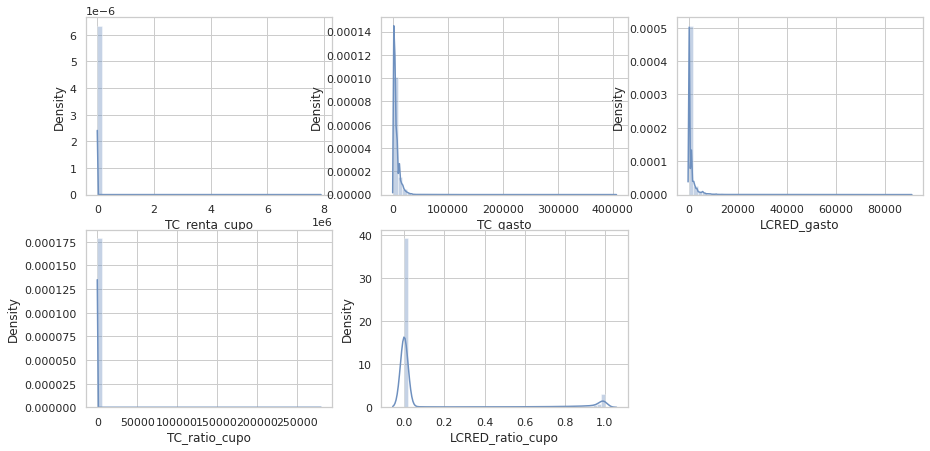

In [ ]:
#graf = bd[nuevas].copy()
#graf = graf

#f = plt.figure(figsize=(15,15))
#for i in range(5):
#    f.add_subplot(4, 3, i+1)
#    sns.distplot(graf.iloc[:,i])
#plt.show()

In [ ]:
# comentarios:

# transformaciones logarítmicas:
# 'TC_renta_cupo','TC_gasto','LCRED_gasto','TC_ratio_cupo','LCRED_ratio_cupo'

In [ ]:
bd

,id,periodo,edad,sexo,renta,remuneracion_Q_op,segmento_riesgo,Q_prods,TC_q_op,TC_cupo,...,ABONO_monto,ABONO_op,TRANS_op,TRANS_monto,aumento,TC_renta_cupo,TC_gasto,LCRED_gasto,TC_ratio_cupo,LCRED_ratio_cupo
0,1,202209,74,0,685.667045,0,a,9,1,1136.363636,...,3794.363636,16.0,31.0,2017.272727,NaN,6.033870e-01,526.577273,0.000000,0.463388,0.000000
1,2,202209,68,1,0.000000,0,a,4,2,6818.181818,...,306.818182,1.0,0.0,0.000000,NaN,0.000000e+00,6773.715909,0.000000,0.993478,0.000000
2,3,202209,74,1,511.363636,0,b,2,1,1022.727273,...,7947.058034,2.0,0.0,2110.862161,NaN,5.000000e-01,1022.727273,0.000000,1.000000,0.000000
3,4,202209,80,0,1704.545455,0,a,4,0,0.000000,...,4328.512500,18.0,1.0,170.454545,NaN,0.000000e+00,0.000000,193.972727,0.000000,0.042674
4,5,202209,77,1,0.001136,0,a,4,1,7954.545455,...,3067.114773,5.0,4.0,1480.392045,NaN,1.428571e-07,3598.837500,501.217045,0.452425,0.441071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583875,231114,202203,45,1,6986.818182,0,c,4,1,13636.363636,...,148.295455,3.0,6.0,674.420455,NaN,5.123667e-01,3575.289773,0.000000,0.262188,0.000000
1583876,231115,202203,50,1,4013.506818,0,b,4,1,2272.727273,...,0.000000,0.0,5.0,1122.068182,NaN,1.765943e+00,1783.265909,0.000000,0.784637,0.000000
1583877,231116,202203,43,1,8181.818182,0,a,4,2,14204.545455,...,0.000000,0.0,7.0,1690.215909,NaN,5.760000e-01,10278.604545,0.000000,0.723614,0.000000
1583878,231117,202203,47,1,4417.000000,0,a,5,1,3409.090909,...,1443.181818,2.0,1.0,875.000000,NaN,1.295653e+00,3408.218182,0.000000,0.999744,0.000000


## Transformaciones

In [ ]:
# comentarios:

# transformaciones logarítmicas:
# 'edad','renta','TC_cupo','LCRED_cupo'

# transformaciones logarítmicas:
# 'remuneracion_Q_op','TC_q_op'

# categóricas:
# 'sexo','segmento_riesgo'
# se puede agrupar d+ como segmentos

# ojo con estas variables
# 'Q_prods','CCTE_Q_op','LCRED_Q_op'

In [ ]:
# comentarios:

# transformaciones logarítmicas:
# 'ABONO_monto','ABONO_op','TRANS_op'

In [ ]:
# comentarios:

# transformaciones logarítmicas:
# 'TC_renta_cupo','TC_gasto','LCRED_gasto','TC_ratio_cupo','LCRED_ratio_cupo'

In [ ]:
# transformaciones logarítmicas:
# ln_var = ['edad','renta','TC_cupo','LCRED_cupo','remuneracion_Q_op','TC_q_op','ABONO_monto','ABONO_op','TRANS_op','TC_renta_cupo','TC_gasto','LCRED_gasto','TC_ratio_cupo','LCRED_ratio_cupo']

In [ ]:
# crear variables normalizadas
ln_var  = ['edad','renta','TC_cupo','LCRED_cupo','remuneracion_Q_op','TC_q_op','ABONO_monto',
                   'ABONO_op','TRANS_op','TC_renta_cupo','TC_gasto','LCRED_gasto','TC_ratio_cupo','LCRED_ratio_cupo']
for l in ln_var:
  var = 'ln_' + l
  bd[var] = bd[l].apply(lambda x: np.log(x+1) if x == 0 else np.log(x))
bd.head()

,id,periodo,edad,sexo,renta,remuneracion_Q_op,segmento_riesgo,Q_prods,TC_q_op,TC_cupo,...,ln_remuneracion_Q_op,ln_TC_q_op,ln_ABONO_monto,ln_ABONO_op,ln_TRANS_op,ln_TC_renta_cupo,ln_TC_gasto,ln_LCRED_gasto,ln_TC_ratio_cupo,ln_LCRED_ratio_cupo
0,1,202209,74,0,685.667045,0,a,9,1,1136.363636,...,0.0,0.000000,8.241272,2.772589,3.433987,-0.505196,6.266398,0.000000,-0.769191,0.000000
1,2,202209,68,1,0.000000,0,a,4,2,6818.181818,...,0.0,0.693147,5.726255,0.000000,0.000000,0.000000,8.820805,0.000000,-0.006543,0.000000
2,3,202209,74,1,511.363636,0,b,2,1,1022.727273,...,0.0,0.000000,8.980557,0.693147,0.000000,-0.693147,6.930228,0.000000,0.000000,0.000000
3,4,202209,80,0,1704.545455,0,a,4,0,0.000000,...,0.0,0.000000,8.372979,2.890372,0.000000,0.000000,0.000000,5.267718,0.000000,-3.154165
4,5,202209,77,1,0.001136,0,a,4,1,7954.545455,...,0.0,0.000000,8.028493,1.609438,1.386294,-15.761421,8.188366,6.217039,-0.793133,-0.818549


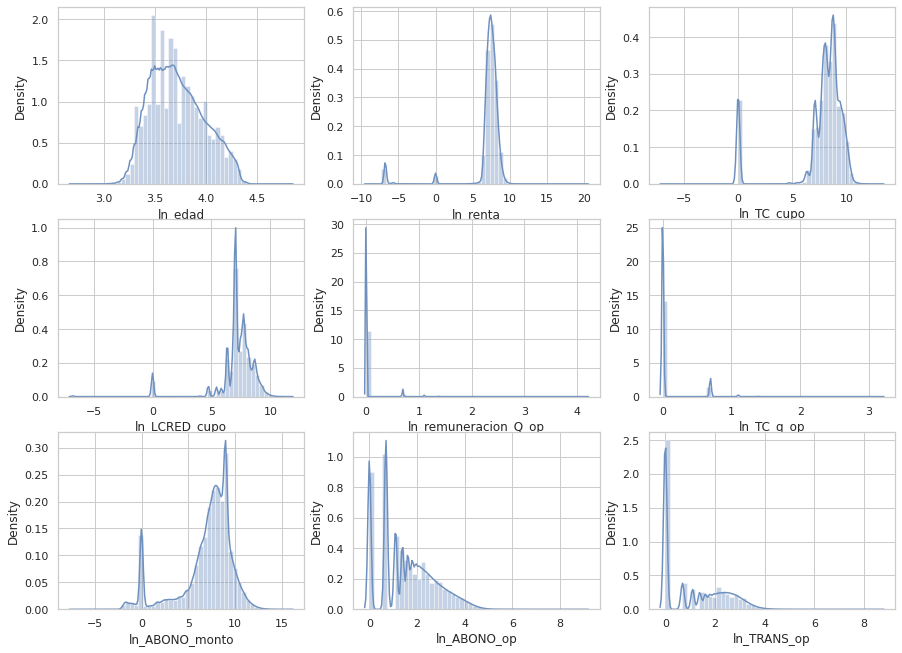

In [ ]:
# distplot tras normalización
#vars = ['ln_edad','ln_renta','ln_TC_cupo','ln_LCRED_cupo','ln_remuneracion_Q_op','ln_TC_q_op','ln_ABONO_monto',
 #                  'ln_ABONO_op','ln_TRANS_op']
#graf = bd[vars].copy()
#graf = graf.iloc[:,11:20]

#f = plt.figure(figsize=(15,15))
#for i in range(9):
#    f.add_subplot(4, 3, i+1)
#    sns.distplot(graf.iloc[:,i])
#plt.show()

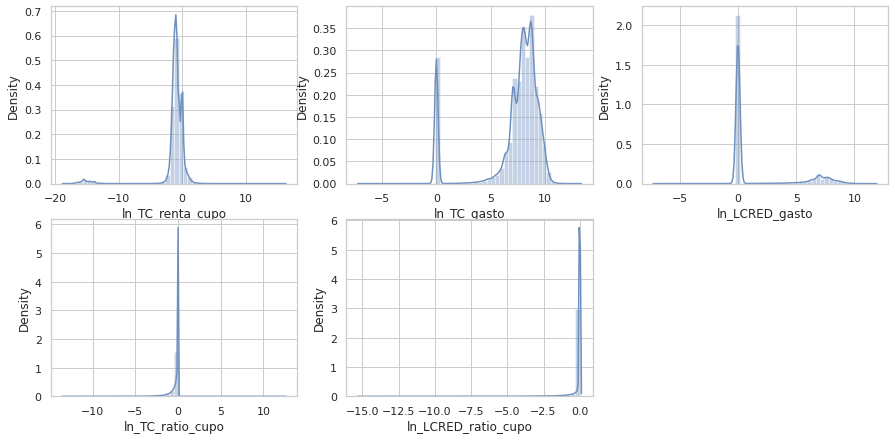

In [ ]:
# distplot tras normalización
#vars = ['ln_TC_renta_cupo','ln_TC_gasto','ln_LCRED_gasto','ln_TC_ratio_cupo','ln_LCRED_ratio_cupo']
#graf = bd[vars].copy()
#graf = graf.iloc[:,11:20]

#f = plt.figure(figsize=(15,15))
#for i in range(5):
#    f.add_subplot(4, 3, i+1)
#    sns.distplot(graf.iloc[:,i])
#plt.show()

In [ ]:
# conclusión, mejor estandarizar variables

In [ ]:
# categóricas:
# sexo, segmento_riesgo

In [ ]:
# transformar variables categóricas a binarias
bd = pd.get_dummies(bd,columns=['sexo'])
bd.head()

,id,periodo,edad,renta,remuneracion_Q_op,segmento_riesgo,Q_prods,TC_q_op,TC_cupo,TC_saldo,...,ln_ABONO_monto,ln_ABONO_op,ln_TRANS_op,ln_TC_renta_cupo,ln_TC_gasto,ln_LCRED_gasto,ln_TC_ratio_cupo,ln_LCRED_ratio_cupo,sexo_0,sexo_1
0,1,202209,74,685.667045,0,a,9,1,1136.363636,609.786364,...,8.241272,2.772589,3.433987,-0.505196,6.266398,0.000000,-0.769191,0.000000,1,0
1,2,202209,68,0.000000,0,a,4,2,6818.181818,44.465909,...,5.726255,0.000000,0.000000,0.000000,8.820805,0.000000,-0.006543,0.000000,0,1
2,3,202209,74,511.363636,0,b,2,1,1022.727273,0.000000,...,8.980557,0.693147,0.000000,-0.693147,6.930228,0.000000,0.000000,0.000000,0,1
3,4,202209,80,1704.545455,0,a,4,0,0.000000,0.000000,...,8.372979,2.890372,0.000000,0.000000,0.000000,5.267718,0.000000,-3.154165,1,0
4,5,202209,77,0.001136,0,a,4,1,7954.545455,4355.707955,...,8.028493,1.609438,1.386294,-15.761421,8.188366,6.217039,-0.793133,-0.818549,0,1


In [ ]:
bd['segmento_riesgo'].unique()

array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
       'n'], dtype=object)

In [ ]:
# codificar segmento
segmentos = {  0: "No Aplica",
                           'a': 'A',
                          'b': "B",
                          'c': "C",
                          'd': "D",
                          'e': '+D',
                          'f': '+D',
                          'g': '+D',
                          'h': '+D',
                          'i': '+D',
                          'j': '+D',
                          'k': '+D',
                          'l': '+D',
                          'm': '+D',
                          'n': '+D'
                         }

In [ ]:
bd = bd.replace({'segmento_riesgo': segmentos})
bd

,id,periodo,edad,renta,remuneracion_Q_op,segmento_riesgo,Q_prods,TC_q_op,TC_cupo,TC_saldo,...,ln_ABONO_monto,ln_ABONO_op,ln_TRANS_op,ln_TC_renta_cupo,ln_TC_gasto,ln_LCRED_gasto,ln_TC_ratio_cupo,ln_LCRED_ratio_cupo,sexo_0,sexo_1
0,1,202209,74,685.667045,0,A,9,1,1136.363636,609.786364,...,8.241272,2.772589,3.433987,-0.505196,6.266398,0.000000,-0.769191,0.000000,1,0
1,2,202209,68,0.000000,0,A,4,2,6818.181818,44.465909,...,5.726255,0.000000,0.000000,0.000000,8.820805,0.000000,-0.006543,0.000000,0,1
2,3,202209,74,511.363636,0,B,2,1,1022.727273,0.000000,...,8.980557,0.693147,0.000000,-0.693147,6.930228,0.000000,0.000000,0.000000,0,1
3,4,202209,80,1704.545455,0,A,4,0,0.000000,0.000000,...,8.372979,2.890372,0.000000,0.000000,0.000000,5.267718,0.000000,-3.154165,1,0
4,5,202209,77,0.001136,0,A,4,1,7954.545455,4355.707955,...,8.028493,1.609438,1.386294,-15.761421,8.188366,6.217039,-0.793133,-0.818549,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583875,231114,202203,45,6986.818182,0,C,4,1,13636.363636,10061.073864,...,4.999207,1.098612,1.791759,-0.668715,8.181802,0.000000,-1.338694,0.000000,0,1
1583876,231115,202203,50,4013.506818,0,B,4,1,2272.727273,489.461364,...,0.000000,0.000000,1.609438,0.568685,7.486202,0.000000,-0.242534,0.000000,0,1
1583877,231116,202203,43,8181.818182,0,A,4,2,14204.545455,3925.940909,...,0.000000,0.000000,1.945910,-0.551648,9.237820,0.000000,-0.323498,0.000000,0,1
1583878,231117,202203,47,4417.000000,0,A,5,1,3409.090909,0.872727,...,7.274606,0.693147,0.000000,0.259015,8.133945,0.000000,-0.000256,0.000000,0,1


In [ ]:
# transformar variables categóricas a binarias
bd = pd.get_dummies(bd,columns=['segmento_riesgo'])
bd.head()

,id,periodo,edad,renta,remuneracion_Q_op,Q_prods,TC_q_op,TC_cupo,TC_saldo,CCTE_Q_op,...,ln_LCRED_gasto,ln_TC_ratio_cupo,ln_LCRED_ratio_cupo,sexo_0,sexo_1,segmento_riesgo_+D,segmento_riesgo_A,segmento_riesgo_B,segmento_riesgo_C,segmento_riesgo_D
0,1,202209,74,685.667045,0,9,1,1136.363636,609.786364,1,...,0.000000,-0.769191,0.000000,1,0,0,1,0,0,0
1,2,202209,68,0.000000,0,4,2,6818.181818,44.465909,1,...,0.000000,-0.006543,0.000000,0,1,0,1,0,0,0
2,3,202209,74,511.363636,0,2,1,1022.727273,0.000000,0,...,0.000000,0.000000,0.000000,0,1,0,0,1,0,0
3,4,202209,80,1704.545455,0,4,0,0.000000,0.000000,1,...,5.267718,0.000000,-3.154165,1,0,0,1,0,0,0
4,5,202209,77,0.001136,0,4,1,7954.545455,4355.707955,1,...,6.217039,-0.793133,-0.818549,0,1,0,1,0,0,0


In [ ]:
# estadísticos de variables numéricas
#df.iloc[:,1:20].describe().T.round(3)

In [ ]:
bd.columns

Index(['id', 'periodo', 'edad', 'renta', 'remuneracion_Q_op', 'Q_prods',
       'TC_q_op', 'TC_cupo', 'TC_saldo', 'CCTE_Q_op', 'CCTE_saldo',
       'LCRED_Q_op', 'LCRED_cupo', 'LCRED_saldo', 'ABONO_monto', 'ABONO_op',
       'TRANS_op', 'TRANS_monto', 'aumento', 'TC_renta_cupo', 'TC_gasto',
       'LCRED_gasto', 'TC_ratio_cupo', 'LCRED_ratio_cupo', 'ln_edad',
       'ln_renta', 'ln_TC_cupo', 'ln_LCRED_cupo', 'ln_remuneracion_Q_op',
       'ln_TC_q_op', 'ln_ABONO_monto', 'ln_ABONO_op', 'ln_TRANS_op',
       'ln_TC_renta_cupo', 'ln_TC_gasto', 'ln_LCRED_gasto', 'ln_TC_ratio_cupo',
       'ln_LCRED_ratio_cupo', 'sexo_0', 'sexo_1', 'segmento_riesgo_+D',
       'segmento_riesgo_A', 'segmento_riesgo_B', 'segmento_riesgo_C',
       'segmento_riesgo_D'],
      dtype='object')

In [ ]:
vars = ['id', 'periodo', 'edad', 'renta', 'remuneracion_Q_op', 'Q_prods',
       'TC_q_op', 'TC_cupo', 'TC_saldo', 'CCTE_Q_op', 'CCTE_saldo',
       'LCRED_Q_op', 'LCRED_cupo', 'LCRED_saldo', 'ABONO_monto', 'ABONO_op',
       'TRANS_op', 'TRANS_monto', 'TC_renta_cupo', 'TC_gasto',
       'LCRED_gasto', 'TC_ratio_cupo', 'LCRED_ratio_cupo', 'sexo_0', 'sexo_1', 'segmento_riesgo_+D',
       'segmento_riesgo_A', 'segmento_riesgo_B', 'segmento_riesgo_C',
       'segmento_riesgo_D','aumento']

bd = bd[vars]

In [ ]:
bd

,id,periodo,edad,renta,remuneracion_Q_op,Q_prods,TC_q_op,TC_cupo,TC_saldo,CCTE_Q_op,...,TC_ratio_cupo,LCRED_ratio_cupo,sexo_0,sexo_1,segmento_riesgo_+D,segmento_riesgo_A,segmento_riesgo_B,segmento_riesgo_C,segmento_riesgo_D,aumento
0,1,202209,74,685.667045,0,9,1,1136.363636,609.786364,1,...,0.463388,0.000000,1,0,0,1,0,0,0,NaN
1,2,202209,68,0.000000,0,4,2,6818.181818,44.465909,1,...,0.993478,0.000000,0,1,0,1,0,0,0,NaN
2,3,202209,74,511.363636,0,2,1,1022.727273,0.000000,0,...,1.000000,0.000000,0,1,0,0,1,0,0,NaN
3,4,202209,80,1704.545455,0,4,0,0.000000,0.000000,1,...,0.000000,0.042674,1,0,0,1,0,0,0,NaN
4,5,202209,77,0.001136,0,4,1,7954.545455,4355.707955,1,...,0.452425,0.441071,0,1,0,1,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583875,231114,202203,45,6986.818182,0,4,1,13636.363636,10061.073864,1,...,0.262188,0.000000,0,1,0,0,0,1,0,NaN
1583876,231115,202203,50,4013.506818,0,4,1,2272.727273,489.461364,1,...,0.784637,0.000000,0,1,0,0,1,0,0,NaN
1583877,231116,202203,43,8181.818182,0,4,2,14204.545455,3925.940909,1,...,0.723614,0.000000,0,1,0,1,0,0,0,NaN
1583878,231117,202203,47,4417.000000,0,5,1,3409.090909,0.872727,1,...,0.999744,0.000000,0,1,0,1,0,0,0,NaN


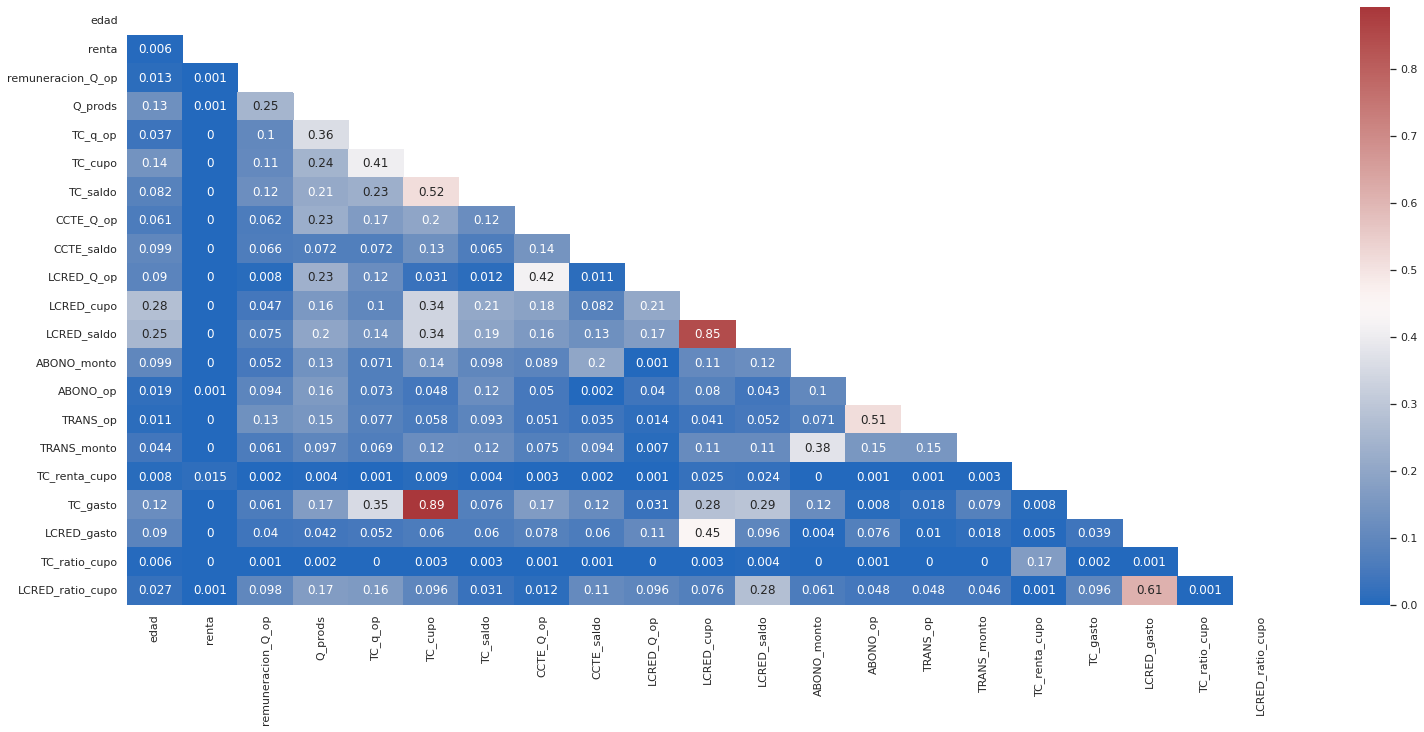

In [ ]:
# heatmap de correlación para variables numéricas no normalizadas
f = ['edad',
'renta', 'remuneracion_Q_op',
        'Q_prods', 'TC_q_op', 'TC_cupo', 'TC_saldo',
       'CCTE_Q_op', 'CCTE_saldo', 'LCRED_Q_op', 'LCRED_cupo', 'LCRED_saldo',
       'ABONO_monto', 'ABONO_op', 'TRANS_op', 'TRANS_monto',
       'TC_renta_cupo', 'TC_gasto', 'LCRED_gasto', 'TC_ratio_cupo',
       'LCRED_ratio_cupo',]

corr = bd[f].corr(method='pearson').abs().round(3)

f, ax = plt.subplots(figsize=(26, 11))
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [ ]:
bd['aumento'].value_counts()/df.shape[0]

1.0    0.016455
Name: aumento, dtype: float64

In [ ]:
mask = bd['periodo'] == 202209
bd[mask]

,id,periodo,edad,renta,remuneracion_Q_op,Q_prods,TC_q_op,TC_cupo,TC_saldo,CCTE_Q_op,...,TC_ratio_cupo,LCRED_ratio_cupo,sexo_0,sexo_1,segmento_riesgo_+D,segmento_riesgo_A,segmento_riesgo_B,segmento_riesgo_C,segmento_riesgo_D,aumento
0,1,202209,74,685.667045,0,9,1,1136.363636,609.786364,1,...,0.463388,0.000000,1,0,0,1,0,0,0,NaN
1,2,202209,68,0.000000,0,4,2,6818.181818,44.465909,1,...,0.993478,0.000000,0,1,0,1,0,0,0,NaN
2,3,202209,74,511.363636,0,2,1,1022.727273,0.000000,0,...,1.000000,0.000000,0,1,0,0,1,0,0,NaN
3,4,202209,80,1704.545455,0,4,0,0.000000,0.000000,1,...,0.000000,0.042674,1,0,0,1,0,0,0,NaN
4,5,202209,77,0.001136,0,4,1,7954.545455,4355.707955,1,...,0.452425,0.441071,0,1,0,1,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231344,231115,202209,50,4013.506818,0,4,1,2272.727273,186.548864,1,...,0.917918,0.000000,0,1,0,1,0,0,0,NaN
231345,231116,202209,44,8181.818182,1,4,2,14204.545455,3113.057955,1,...,0.780841,0.000000,0,1,0,1,0,0,0,NaN
231346,231117,202209,48,4417.000000,0,5,1,3409.090909,-0.125000,1,...,1.000037,0.996486,0,1,0,0,0,1,0,NaN
231347,231118,202209,37,14657.411364,0,5,1,5681.818182,-117.182955,1,...,1.020624,0.000000,0,1,0,1,0,0,0,NaN


In [ ]:
bd2 = bd.copy()
mask = bd2['periodo'] != 202209
bd2 = bd2[mask]

In [ ]:
bd2

,id,periodo,edad,renta,remuneracion_Q_op,Q_prods,TC_q_op,TC_cupo,TC_saldo,CCTE_Q_op,...,TC_ratio_cupo,LCRED_ratio_cupo,sexo_0,sexo_1,segmento_riesgo_+D,segmento_riesgo_A,segmento_riesgo_B,segmento_riesgo_C,segmento_riesgo_D,aumento
231349,1,202208,74,685.667045,0,9,1,1136.363636,1136.363636,1,...,0.000000,0.00000,1,0,0,1,0,0,0,NaN
231350,2,202208,68,0.000000,0,4,2,6818.181818,41.572727,1,...,0.993903,0.00000,0,1,0,1,0,0,0,NaN
231351,3,202208,74,511.363636,0,2,1,1022.727273,0.000000,0,...,1.000000,0.00000,0,1,0,0,1,0,0,NaN
231352,4,202208,80,1704.545455,0,4,0,0.000000,0.000000,1,...,0.000000,0.09869,1,0,0,1,0,0,0,NaN
231353,5,202208,77,0.001136,0,4,1,7954.545455,2716.700000,1,...,0.658472,0.00000,0,1,0,1,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583875,231114,202203,45,6986.818182,0,4,1,13636.363636,10061.073864,1,...,0.262188,0.00000,0,1,0,0,0,1,0,NaN
1583876,231115,202203,50,4013.506818,0,4,1,2272.727273,489.461364,1,...,0.784637,0.00000,0,1,0,0,1,0,0,NaN
1583877,231116,202203,43,8181.818182,0,4,2,14204.545455,3925.940909,1,...,0.723614,0.00000,0,1,0,1,0,0,0,NaN
1583878,231117,202203,47,4417.000000,0,5,1,3409.090909,0.872727,1,...,0.999744,0.00000,0,1,0,1,0,0,0,NaN


In [ ]:
envio = bd.copy()
mask = envio['periodo'] == 202209
envio = envio[mask]

In [ ]:
envio

,id,periodo,edad,renta,remuneracion_Q_op,Q_prods,TC_q_op,TC_cupo,TC_saldo,CCTE_Q_op,...,TC_ratio_cupo,LCRED_ratio_cupo,sexo_0,sexo_1,segmento_riesgo_+D,segmento_riesgo_A,segmento_riesgo_B,segmento_riesgo_C,segmento_riesgo_D,aumento
0,1,202209,74,685.667045,0,9,1,1136.363636,609.786364,1,...,0.463388,0.000000,1,0,0,1,0,0,0,NaN
1,2,202209,68,0.000000,0,4,2,6818.181818,44.465909,1,...,0.993478,0.000000,0,1,0,1,0,0,0,NaN
2,3,202209,74,511.363636,0,2,1,1022.727273,0.000000,0,...,1.000000,0.000000,0,1,0,0,1,0,0,NaN
3,4,202209,80,1704.545455,0,4,0,0.000000,0.000000,1,...,0.000000,0.042674,1,0,0,1,0,0,0,NaN
4,5,202209,77,0.001136,0,4,1,7954.545455,4355.707955,1,...,0.452425,0.441071,0,1,0,1,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231344,231115,202209,50,4013.506818,0,4,1,2272.727273,186.548864,1,...,0.917918,0.000000,0,1,0,1,0,0,0,NaN
231345,231116,202209,44,8181.818182,1,4,2,14204.545455,3113.057955,1,...,0.780841,0.000000,0,1,0,1,0,0,0,NaN
231346,231117,202209,48,4417.000000,0,5,1,3409.090909,-0.125000,1,...,1.000037,0.996486,0,1,0,0,0,1,0,NaN
231347,231118,202209,37,14657.411364,0,5,1,5681.818182,-117.182955,1,...,1.020624,0.000000,0,1,0,1,0,0,0,NaN


In [ ]:
null = ['aumento']
for n in null:
  zero = 0
  bd2[n].fillna(value=zero,inplace=True)

In [ ]:
bd2['aumento'].value_counts()/df.shape[0]

0.0    0.837481
1.0    0.016455
Name: aumento, dtype: float64

In [ ]:
bd2.isna().sum()

id                    0
periodo               0
edad                  0
renta                 0
remuneracion_Q_op     0
Q_prods               0
TC_q_op               0
TC_cupo               0
TC_saldo              0
CCTE_Q_op             0
CCTE_saldo            0
LCRED_Q_op            0
LCRED_cupo            0
LCRED_saldo           0
ABONO_monto           0
ABONO_op              0
TRANS_op              0
TRANS_monto           0
TC_renta_cupo         0
TC_gasto              0
LCRED_gasto           0
TC_ratio_cupo         0
LCRED_ratio_cupo      0
sexo_0                0
sexo_1                0
segmento_riesgo_+D    0
segmento_riesgo_A     0
segmento_riesgo_B     0
segmento_riesgo_C     0
segmento_riesgo_D     0
aumento               0
dtype: int64

In [ ]:
envio.isna().sum()

id                         0
periodo                    0
edad                       0
renta                      0
remuneracion_Q_op          0
Q_prods                    0
TC_q_op                    0
TC_cupo                    0
TC_saldo                   0
CCTE_Q_op                  0
CCTE_saldo                 0
LCRED_Q_op                 0
LCRED_cupo                 0
LCRED_saldo                0
ABONO_monto                0
ABONO_op                   0
TRANS_op                   0
TRANS_monto                0
TC_renta_cupo              0
TC_gasto                   0
LCRED_gasto                0
TC_ratio_cupo              0
LCRED_ratio_cupo           0
sexo_0                     0
sexo_1                     0
segmento_riesgo_+D         0
segmento_riesgo_A          0
segmento_riesgo_B          0
segmento_riesgo_C          0
segmento_riesgo_D          0
aumento               231349
dtype: int64

## Selección de Atributos

### Random Forest y Feature Importances

In [ ]:
# muestra del dataframe para random forest
X = bd2.copy()
X = X.sample(1000)
y = X['aumento']
X = X.drop(columns=['aumento','id','periodo'])

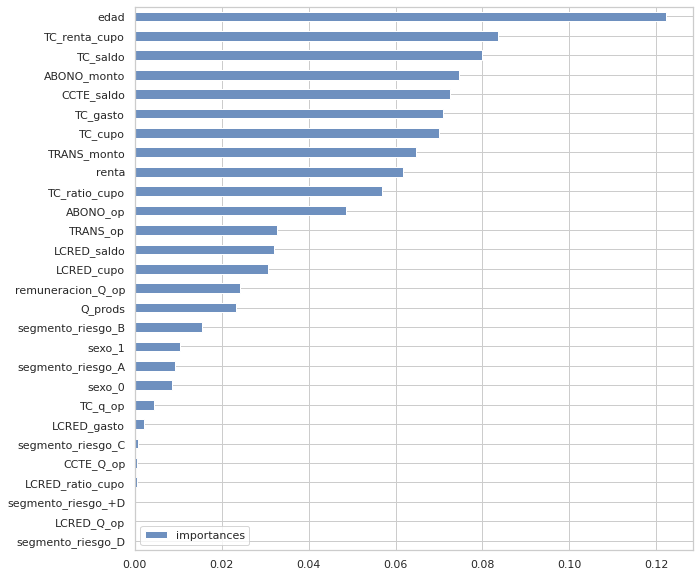

In [ ]:
# entrenamiento y obtención de feature importance para variables no normalizadas
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=12345)
forest.fit(X, y)

bestfeatures = set()

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
imps = pd.DataFrame.from_dict({"importances": importances})
imps.index = list(X)
imps.sort_values(by="importances").plot.barh(figsize=(10, 10))
bestfeatures |= set(imps.sort_values(by="importances").iloc[-10:].index) # add best features

In [ ]:
# cantidades de operaciones en CCTE, TC, LCRED, remuneraciones no aportan al parecer

# ['LCRED_Q_op','CCTE_Q_op','TC_q_op','remuneracion_Q_op']

In [ ]:
# se podrían descartar los segmentos de riesgo
# ['segmento_riesgo_A','segmento_riesgo_B', 'segmento_riesgo_C', 'segmento_riesgo_D',]

In [ ]:
# se pueden descartar LCRED GASTO
# 'LCRED_gasto'

In [ ]:
descarte = ['LCRED_Q_op','CCTE_Q_op','TC_q_op','remuneracion_Q_op','segmento_riesgo_A','segmento_riesgo_B', 'segmento_riesgo_C', 'segmento_riesgo_D','LCRED_gasto']

### Variables Seleccionadas

In [ ]:
# se descartan: 'ID','Nacionalidad' por no aportar información
# se descartan las variables 'AgnosDirec', 'AgnosEmpleo', 'DeudaExt', 'DeudaInt', 'Edad','Ingreso', 'Ingreso2',  'DeudaIng', "DeudaTotal" y se dejan las variables normalizadas
# ln_Ingreso2 se descarta por colinealidad cuasi-perfecta con ln_Ingreso, además de verse con menor feature immportance vs ln_Ingreso
# ln_DeudaTotal se descarta por colinealidad cuasi-perfecta con ln_DeudaInt y ln_DeudaExt, además de verse con menor feature immportance
# se dejan las variables de NivelEdu, al verse una variación entre niveles educacionales sobre la variable objetivo

In [ ]:
bd2.columns

Index(['id', 'periodo', 'edad', 'renta', 'remuneracion_Q_op', 'Q_prods',
       'TC_q_op', 'TC_cupo', 'TC_saldo', 'CCTE_Q_op', 'CCTE_saldo',
       'LCRED_Q_op', 'LCRED_cupo', 'LCRED_saldo', 'ABONO_monto', 'ABONO_op',
       'TRANS_op', 'TRANS_monto', 'TC_renta_cupo', 'TC_gasto', 'LCRED_gasto',
       'TC_ratio_cupo', 'LCRED_ratio_cupo', 'sexo_0', 'sexo_1',
       'segmento_riesgo_+D', 'segmento_riesgo_A', 'segmento_riesgo_B',
       'segmento_riesgo_C', 'segmento_riesgo_D', 'aumento'],
      dtype='object')

In [ ]:
features = ['id', 'periodo', 'edad', 'sexo_1', 'segmento_riesgo_A',
       'segmento_riesgo_B', 'segmento_riesgo_C', 'segmento_riesgo_D', 'renta',
       'remuneracion_Q_op', 'Q_prods', 'TC_q_op', 'TC_cupo', 'TC_saldo',
       'CCTE_Q_op', 'CCTE_saldo', 'LCRED_Q_op', 'LCRED_cupo', 'LCRED_saldo',
       'ABONO_monto', 'ABONO_op', 'TRANS_op', 'TRANS_monto', 'TC_renta_cupo',
       'TC_gasto', 'LCRED_gasto', 'TC_ratio_cupo', 'LCRED_ratio_cupo',
       'aumento']
consolidado = bd2[features]
consolidado = consolidado.drop(columns=descarte)

In [ ]:
envio = envio[features]
envio = envio.drop(columns=descarte)

In [ ]:
consolidado

,id,periodo,edad,sexo_1,renta,Q_prods,TC_cupo,TC_saldo,CCTE_saldo,LCRED_cupo,LCRED_saldo,ABONO_monto,ABONO_op,TRANS_op,TRANS_monto,TC_renta_cupo,TC_gasto,TC_ratio_cupo,LCRED_ratio_cupo,aumento
231349,1,202208,74,0,685.667045,9,1136.363636,1136.363636,11352.039773,0.000000,0.000000,5249.069318,25.0,22.0,2238.636364,6.033870e-01,0.000000,0.000000,0.00000,0.0
231350,2,202208,68,1,0.000000,4,6818.181818,41.572727,10.169318,1136.363636,1136.363636,681.818182,1.0,0.0,0.000000,0.000000e+00,6776.609091,0.993903,0.00000,0.0
231351,3,202208,74,1,511.363636,2,1022.727273,0.000000,0.000000,0.000000,0.000000,7947.058034,2.0,0.0,2110.862161,5.000000e-01,1022.727273,1.000000,0.00000,0.0
231352,4,202208,80,0,1704.545455,4,0.000000,0.000000,0.000000,4545.454545,4096.864773,3469.013636,17.0,4.0,738.636364,0.000000e+00,0.000000,0.000000,0.09869,0.0
231353,5,202208,77,1,0.001136,4,7954.545455,2716.700000,583.101136,1136.363636,1136.363636,2772.020455,10.0,1.0,1135.607955,1.428571e-07,5237.845455,0.658472,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583875,231114,202203,45,1,6986.818182,4,13636.363636,10061.073864,95399.531818,1306.818182,1306.818182,148.295455,3.0,6.0,674.420455,5.123667e-01,3575.289773,0.262188,0.00000,0.0
1583876,231115,202203,50,1,4013.506818,4,2272.727273,489.461364,9120.090909,1136.363636,1136.363636,0.000000,0.0,5.0,1122.068182,1.765943e+00,1783.265909,0.784637,0.00000,0.0
1583877,231116,202203,43,1,8181.818182,4,14204.545455,3925.940909,61526.118182,5681.818182,5681.818182,0.000000,0.0,7.0,1690.215909,5.760000e-01,10278.604545,0.723614,0.00000,0.0
1583878,231117,202203,47,1,4417.000000,5,3409.090909,0.872727,4.588636,1136.363636,1136.363636,1443.181818,2.0,1.0,875.000000,1.295653e+00,3408.218182,0.999744,0.00000,0.0


In [ ]:
envio

,id,periodo,edad,sexo_1,renta,Q_prods,TC_cupo,TC_saldo,CCTE_saldo,LCRED_cupo,LCRED_saldo,ABONO_monto,ABONO_op,TRANS_op,TRANS_monto,TC_renta_cupo,TC_gasto,TC_ratio_cupo,LCRED_ratio_cupo,aumento
0,1,202209,74,0,685.667045,9,1136.363636,609.786364,10586.322727,0.000000,0.000000,3794.363636,16.0,31.0,2017.272727,6.033870e-01,526.577273,0.463388,0.000000,NaN
1,2,202209,68,1,0.000000,4,6818.181818,44.465909,316.987500,1136.363636,1136.363636,306.818182,1.0,0.0,0.000000,0.000000e+00,6773.715909,0.993478,0.000000,NaN
2,3,202209,74,1,511.363636,2,1022.727273,0.000000,0.000000,0.000000,0.000000,7947.058034,2.0,0.0,2110.862161,5.000000e-01,1022.727273,1.000000,0.000000,NaN
3,4,202209,80,0,1704.545455,4,0.000000,0.000000,0.000000,4545.454545,4351.481818,4328.512500,18.0,1.0,170.454545,0.000000e+00,0.000000,0.000000,0.042674,NaN
4,5,202209,77,1,0.001136,4,7954.545455,4355.707955,0.000000,1136.363636,635.146591,3067.114773,5.0,4.0,1480.392045,1.428571e-07,3598.837500,0.452425,0.441071,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231344,231115,202209,50,1,4013.506818,4,2272.727273,186.548864,5489.072727,1136.363636,1136.363636,5088.039773,1.0,0.0,0.000000,1.765943e+00,2086.178409,0.917918,0.000000,NaN
231345,231116,202209,44,1,8181.818182,4,14204.545455,3113.057955,74037.314773,5681.818182,5681.818182,7558.481818,3.0,1.0,189.204545,5.760000e-01,11091.487500,0.780841,0.000000,NaN
231346,231117,202209,48,1,4417.000000,5,3409.090909,-0.125000,0.000000,1136.363636,3.993182,0.115909,2.0,0.0,0.000000,1.295653e+00,3409.215909,1.000037,0.996486,NaN
231347,231118,202209,37,1,14657.411364,5,5681.818182,-117.182955,6764.305682,3409.090909,3409.090909,5316.212500,1.0,6.0,69.896591,2.579704e+00,5799.001136,1.020624,0.000000,NaN


In [ ]:
consolidado.shape

(1352531, 20)

In [ ]:
envio.shape

(231349, 20)

In [ ]:
consolidado.isna().sum()

id                  0
periodo             0
edad                0
sexo_1              0
renta               0
Q_prods             0
TC_cupo             0
TC_saldo            0
CCTE_saldo          0
LCRED_cupo          0
LCRED_saldo         0
ABONO_monto         0
ABONO_op            0
TRANS_op            0
TRANS_monto         0
TC_renta_cupo       0
TC_gasto            0
TC_ratio_cupo       0
LCRED_ratio_cupo    0
aumento             0
dtype: int64

In [ ]:
envio.isna().sum()

id                       0
periodo                  0
edad                     0
sexo_1                   0
renta                    0
Q_prods                  0
TC_cupo                  0
TC_saldo                 0
CCTE_saldo               0
LCRED_cupo               0
LCRED_saldo              0
ABONO_monto              0
ABONO_op                 0
TRANS_op                 0
TRANS_monto              0
TC_renta_cupo            0
TC_gasto                 0
TC_ratio_cupo            0
LCRED_ratio_cupo         0
aumento             231349
dtype: int64

In [ ]:
consolidado.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
id,1352531.0,114973.44,66913.38,1.00,56921.00,114544.00,172654.00,2.319550e+05
periodo,1352531.0,202205.53,1.71,202203.00,202204.00,202206.00,202207.00,2.022080e+05
edad,1352531.0,42.58,11.58,15.00,33.00,40.00,49.00,1.220000e+02
sexo_1,1352531.0,0.59,0.49,0.00,0.00,1.00,1.00,1.000000e+00
renta,1352531.0,4855.60,1196785.06,0.00,1150.62,1763.96,2845.50,5.681831e+08
Q_prods,1352531.0,5.00,1.22,1.00,4.00,5.00,6.00,1.100000e+01
TC_cupo,1352531.0,6446.30,6968.50,0.00,2272.73,4204.55,7954.55,2.159091e+05
TC_saldo,1352531.0,1373.41,3145.03,-306125.24,0.00,69.71,1387.30,1.490992e+05
CCTE_saldo,1352531.0,3379.55,13376.89,-25182.02,0.54,359.19,2385.54,4.926667e+06
LCRED_cupo,1352531.0,2503.12,2966.83,0.00,1136.36,1477.27,2840.91,1.136364e+05


In [ ]:
envio.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
id,231349.0,115675.95,66785.34,1.00,57839.00,115676.00,173513.00,2.313530e+05
periodo,231349.0,202209.00,0.00,202209.00,202209.00,202209.00,202209.00,2.022090e+05
edad,231349.0,42.69,11.55,16.00,34.00,40.00,50.00,1.220000e+02
sexo_1,231349.0,0.59,0.49,0.00,0.00,1.00,1.00,1.000000e+00
renta,231349.0,4791.16,1181347.93,0.00,1153.38,1775.38,2865.80,5.681831e+08
Q_prods,231349.0,5.02,1.24,1.00,4.00,5.00,6.00,1.100000e+01
TC_cupo,231349.0,6619.20,7181.69,0.00,2272.73,4545.45,7954.55,4.556818e+05
TC_saldo,231349.0,1448.97,3248.53,-260594.70,0.00,97.21,1505.50,1.027034e+05
CCTE_saldo,231349.0,2705.03,9882.54,-44315.12,0.09,296.78,1958.99,9.964885e+05
LCRED_cupo,231349.0,2464.52,2945.96,0.00,1136.36,1363.64,2840.91,1.136364e+05


In [ ]:
consolidado.to_csv('/content/drive/MyDrive/Desafío Itaú/Bases de Datos/data.csv')

In [ ]:
envio.to_csv('/content/drive/MyDrive/Desafío Itaú/Bases de Datos/envio.csv')